### Importing Libraries


In [169]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly import tools
import plotly.express as px
import statsmodels.api as sm

# other
import random
import json

# statistical Import
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import norm, skew
from scipy.stats import chi2_contingency, f_oneway

# sklearn imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.decomposition import PCA
from sklearn.metrics import auc,roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from category_encoders.one_hot import OneHotEncoder

import missingno as mno
import pickle
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import RFE

### Importing Dataset

In [187]:
leadscore = pd.read_csv("data/Lead Scoring.csv")
leadscore.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [188]:
print("Shape of Dataset is : ",leadscore.shape)

Shape of Dataset is :  (9240, 37)


-  Number of records are very less

In [189]:
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [190]:
leadscore.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## EDA and FE (Data Cleaning)

#### Missing value Analysis

In [191]:
# check for duplicate

leadscore.duplicated().any()

False

In [192]:
# handling missing values

total = leadscore.isnull().sum().sort_values(ascending = False)
percent = (leadscore.isnull().sum()/leadscore.isnull().count()*100).round(2).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Lead Quality,4767,51.59
Asymmetrique Activity Index,4218,45.65
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Tags,3353,36.29
Lead Profile,2709,29.32
What matters most to you in choosing a course,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63


-  There seems to be columns with significant amount of missing values.
- Need to perform missing values analysis and find if there are any important of the columns present else they can be dropped

<AxesSubplot: >

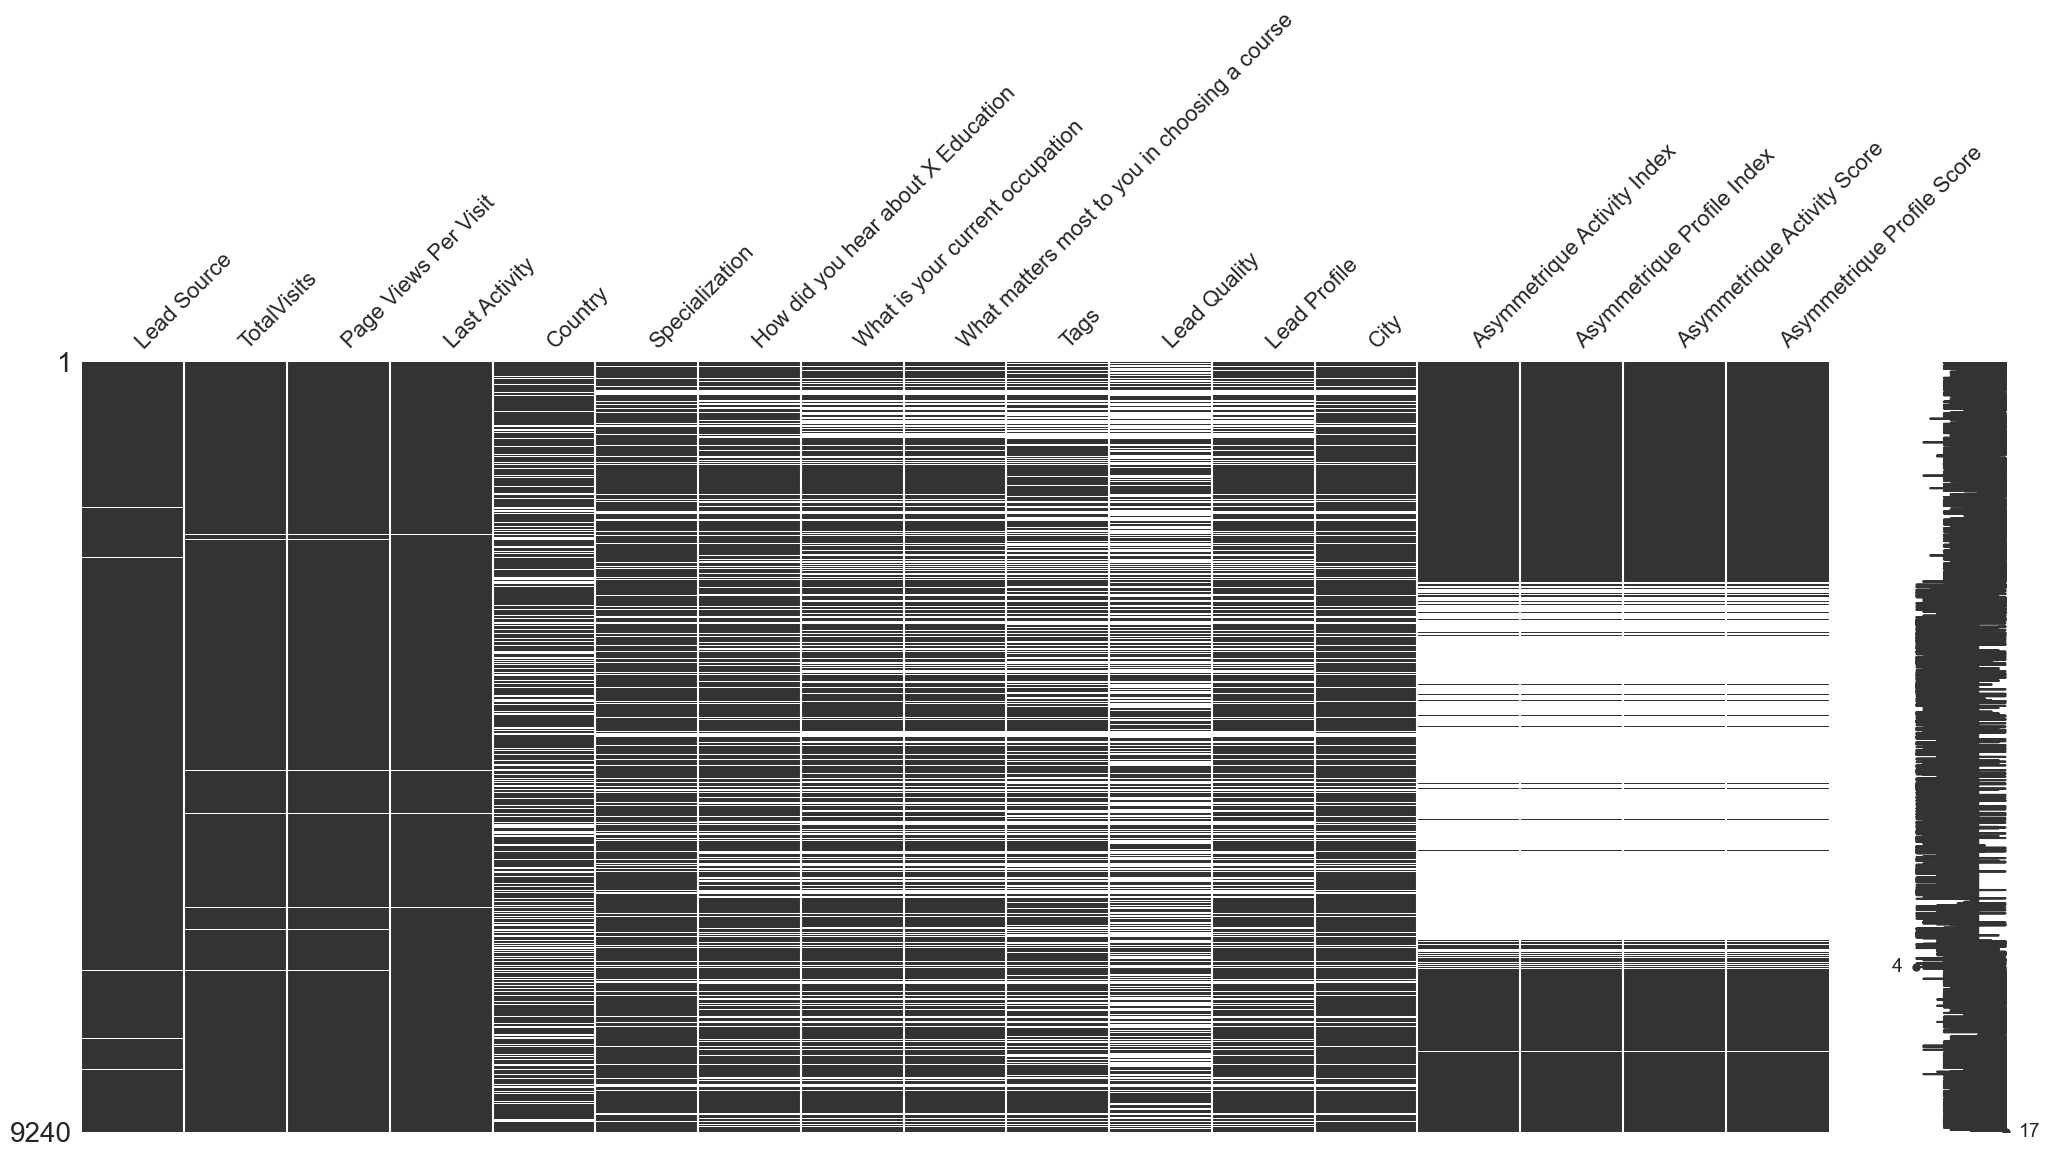

In [193]:
#visualizing columns with missing values
missing_col = [col for col in leadscore.columns if leadscore[col].isna().any()]
mno.matrix(leadscore[missing_col], color = '0.2')

In [194]:
# columns that can be dropped
# keep appending as we find columns that can be droppped

columns_drop = ["Prospect ID", "Lead Number" ]


In [195]:
leadscore.drop(columns=columns_drop, inplace=True,axis=1)

In [196]:
missing_col = [col for col in leadscore.columns if leadscore[col].isna().any()]
print("List of all the columns that have missing values :\n", len(missing_col) ,missing_col)

List of all the columns that have missing values :
 17 ['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


##### Handling columns with missing values more than 40%

In [197]:

missing_cols_greated_40 = [col for col in leadscore.columns if (leadscore[col].isna().sum()/leadscore.shape[0]*100) > 40]
missing_cols_greated_40

['Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

- Lead Quality  
Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.


In [198]:
leadscore["Lead Quality"].isna().sum()

4767

In [199]:
leadscore["Lead Quality"].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

we can apply convert the missing values to Not Sure and assign 0 as part of Label encoding.

In [200]:
leadscore["Lead Quality"].fillna("Not Sure", inplace=True)

In [201]:
leadscore["Lead Quality"].value_counts()

Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

This should make the column show some correlation

- 'Asymmetrique Activity Index'
- 'Asymmetrique Profile Index',

In [202]:
leadscore['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [203]:
leadscore["Asymmetrique Activity Index"].fillna("Nan", inplace=True)

In [204]:
leadscore['Asymmetrique Activity Index'].value_counts()

Nan          4218
02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [205]:
leadscore['Asymmetrique Activity Index'].isna().sum()

0

Completed handling Activity Index

In [206]:
leadscore['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [207]:
leadscore["Asymmetrique Profile Index"].fillna("Nan", inplace=True)

In [208]:
leadscore['Asymmetrique Profile Index'].value_counts()

Nan          4218
02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [209]:
leadscore['Asymmetrique Profile Index'].isna().sum()

0

- 'Asymmetrique Activity Score',
- 'Asymmetrique Profile Score'

In [210]:
leadscore['Asymmetrique Activity Score'].value_counts()

14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [211]:
leadscore['Asymmetrique Profile Score'].value_counts()

15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

In [212]:
leadscore['Asymmetrique Activity Score'].fillna(0.0, inplace=True)
leadscore['Asymmetrique Profile Score'].fillna(0.0, inplace=True)

In [213]:
leadscore['Asymmetrique Activity Score'].isna().sum()


0

In [214]:
leadscore['Asymmetrique Profile Score'].isna().sum()

0

#####  handling missing values less than 40%

In [215]:
# drop columns with more than 45% of missing values

# missing_cols = [col for col in leadscore.columns if (leadscore[col].isna().sum()/leadscore.shape[0]*100) > 40]
# leadscore.drop(missing_cols, axis = 1, inplace = True)

In [216]:
## checking missing values

total = leadscore.isnull().sum().sort_values(ascending = False)
percent = (leadscore.isnull().sum()/leadscore.isnull().count()*100).round(2).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# number of columns reduced to 32

,Total,Percent
Tags,3353,36.29
Lead Profile,2709,29.32
What matters most to you in choosing a course,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63
How did you hear about X Education,2207,23.89
Specialization,1438,15.56
City,1420,15.37
TotalVisits,137,1.48
Page Views Per Visit,137,1.48


In [217]:
leadscore["Asymmetrique Activity Index"].isna().sum()

0

In [218]:
missing_cols = [col for col in leadscore.columns if (leadscore[col].isna().sum()/leadscore.shape[0]*100) > 0.0]

In [219]:
missing_cols

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Profile',
 'City']

In [220]:
leadscore.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,9240.000000,9240.000000
mean,0.385390,3.445238,487.698268,2.362820,7.775541,8.883550
std,0.486714,4.854853,548.021466,2.161418,7.199329,8.250664
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000,0.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000,13.000000,14.000000
75%,1.000000,5.000000,936.000000,3.000000,14.000000,16.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


##### Continuous Features

In [221]:
continuous_features = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]

In [222]:
leadscore.isna().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [223]:
def missing_values(df,col):
    return df[col].isnull().sum()

In [224]:
def continuous_features_imputing(df, col): ## replacing missing values to median
    return leadscore[col].fillna(leadscore[col].median(), inplace=True)

In [225]:
for i in continuous_features:
    continuous_features_imputing(leadscore, i)

In [226]:
leadscore.isna().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

##### Categorical Features

In [227]:
(leadscore.isna().sum()).sort_values(ascending=False)

Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Last Activity                                     103
Lead Source                                        36
Asymmetrique Activity Index                         0
Asymmetrique Profile Index                          0
Receive More Updates About Our Courses              0
Asymmetrique Activity Score                         0
Asymmetrique Profile Score                          0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Get updates on DM Content                           0
Update me on Supply Chain Co

In [228]:
categorical_data = ["Tags","Lead Source", "Country", "Specialization", "How did you hear about X Education", 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',"Lead Profile", "City", "Last Activity"]

- categorical columns Exploring above columns

In [229]:
print(leadscore["Lead Source"].isna().sum())
leadscore["Lead Source"].value_counts()


36


Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Number of NUll values are very less, it doesnt make sense to create another category for null values

In [230]:
print(leadscore["Country"].isna().sum())
leadscore["Country"].value_counts()

2461


India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

Too many categories in the data  
As most of the Leads are from India we can divide data into Two Categories and India and other International Countries  
NULL values as most occuring values

In [231]:
print(leadscore["Specialization"].isna().sum())
leadscore["Specialization"].value_counts()

1438


Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Decent number of categories and have Select as a option so replace it with Unknown

In [232]:
print(leadscore["How did you hear about X Education"].isna().sum())
leadscore["How did you hear about X Education"].value_counts()

2207


Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

Decent number of categories and have Select as a option so replace it with Unknown

In [233]:
print(leadscore['What is your current occupation'].isna().sum())
leadscore['What is your current occupation'].value_counts()

2690


Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [234]:
print(leadscore['What matters most to you in choosing a course'].isna().sum())
leadscore['What matters most to you in choosing a course'].value_counts()

2709


Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [235]:
print(leadscore["Search"].isna().sum())
leadscore["Search"].value_counts()

0


No     9226
Yes      14
Name: Search, dtype: int64

In [236]:
print(leadscore["Lead Profile"].isna().sum())
leadscore["Lead Profile"].value_counts()

2709


Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [237]:
print(leadscore["City"].isna().sum())
leadscore["City"].value_counts()

1420


Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [238]:
print(leadscore["Last Activity"].isna().sum())
leadscore["Last Activity"].value_counts()

103


Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [239]:
print(leadscore["Tags"].isna().sum())
leadscore["Tags"].value_counts()

3353


Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

#### Handling the unknown values and data impurity

In [240]:
## Dealing with Lead Source column

leadscore['Lead Source'].replace('google','Google',inplace = True)
leadscore['Lead Source'].replace('youtubechannel','Social Media',inplace = True)
leadscore['Lead Source'].replace('Facebook','Social Media',inplace = True)
leadscore['Lead Source'].replace('welearnblog_Home','blog',inplace = True)
leadscore["Lead Source"].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Social Media           58
bing                    6
Click2call              4
Press_Release           2
Live Chat               2
blog                    2
WeLearn                 1
testone                 1
Pay per Click Ads       1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [241]:
leadscore.loc[leadscore['Country']!='India','City']="Other International Cities"
leadscore[leadscore['Country']!='India']['City']
leadscore["City"].value_counts()

## most of the values in country column are India, so this feature can be dropped

Mumbai                         2918
Other International Cities     2748
Select                          999
Thane & Outskirts               651
Other Cities                    564
Other Cities of Maharashtra     391
Other Metro Cities              345
Tier II Cities                   69
Name: City, dtype: int64

In [242]:
leadscore[leadscore['Country']!='India']['City']

0       Other International Cities
5       Other International Cities
7       Other International Cities
14      Other International Cities
16      Other International Cities
                   ...            
9217    Other International Cities
9225    Other International Cities
9226    Other International Cities
9235    Other International Cities
9239    Other International Cities
Name: City, Length: 2748, dtype: object

In [243]:
leadscore.loc[leadscore['Country']!='India','City']="Other International Cities"
leadscore[leadscore['Country']!='India']['City']

0       Other International Cities
5       Other International Cities
7       Other International Cities
14      Other International Cities
16      Other International Cities
                   ...            
9217    Other International Cities
9225    Other International Cities
9226    Other International Cities
9235    Other International Cities
9239    Other International Cities
Name: City, Length: 2748, dtype: object

- Some of the columns have Select as a value, we can replace it with Unknown
- Few columns having Null values, we can replace Label that is occuring most
- It makes no sense for mumbai to be a city in an international country. Hence we'll replace it.

In [244]:
#imputing mode value
leadscore['Country']=leadscore['Country'].fillna("India")
#Austrlia lies in asia pacific region so we'll merge them into one category.
leadscore['Country'].replace("Australia","Asia/Pacific Region", inplace=True)
leadscore['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Asia/Pacific Region       15
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Bangladesh                 2
Uganda                     2
Philippines                2
Italy                      2
Netherlands                2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Russia                     1
Tanzania                   1
Sri Lanka                  1
Malaysia                   1
Liberia                    1
Switzerland                1
Denmark       

In [245]:
## handling tag column

leadscore["Tags"].fillna("Unknown", inplace=True)

In [246]:
## for categorical values data can we replace with most repeating category
for i in categorical_data:
    indexes = leadscore[i].value_counts().index
    if "Select" in indexes:
        leadscore[i]=leadscore[i].replace("Select","Unknown")
        leadscore[i]=leadscore[i].fillna("Unknown")
        continue
    leadscore[i]=leadscore[i].fillna(indexes[0])


In [247]:
(leadscore.isna().sum()).sort_values(ascending=False)

Lead Origin                                      0
Lead Profile                                     0
Through Recommendations                          0
Receive More Updates About Our Courses           0
Tags                                             0
Lead Quality                                     0
Update me on Supply Chain Content                0
Get updates on DM Content                        0
City                                             0
Newspaper                                        0
Asymmetrique Activity Index                      0
Asymmetrique Profile Index                       0
Asymmetrique Activity Score                      0
Asymmetrique Profile Score                       0
I agree to pay the amount through cheque         0
A free copy of Mastering The Interview           0
Digital Advertisement                            0
X Education Forums                               0
Lead Source                                      0
Last Activity                  

#### Handling Columns without Null

In [248]:
leadscore.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [249]:
len(leadscore.columns)

35

In [250]:
leadscore

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,India,...,No,Unknown,Other International Cities,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,No,Unknown,Unknown,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,No,Unknown,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,No,Unknown,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,...,No,Potential Lead,Other International Cities,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,No,Unknown,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [251]:
columns_without_nan = ['Lead Origin', 'Do Not Email', 'Do Not Call','Total Time Spent on Website', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',"Search",
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

In [252]:
len(columns_without_nan)

17

In [253]:
leadscore["Search"].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [254]:
leadscore["Lead Origin"].replace("Quick Add Form","Lead Add Form", inplace=True)
leadscore["Lead Origin"].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               719
Lead Import                  55
Name: Lead Origin, dtype: int64

In [255]:
valueCounts_NotNan = pd.DataFrame(columns=["columns", "values", "count"])
for i in columns_without_nan:
    valueCounts_NotNan.loc[len(valueCounts_NotNan)] = [i,list(leadscore[i].value_counts().index), list(leadscore[i].value_counts().values)]

In [256]:
valueCounts_NotNan

,columns,values,count
0,Lead Origin,"[Landing Page Submission, API, Lead Add Form, ...","[4886, 3580, 719, 55]"
1,Do Not Email,"[No, Yes]","[8506, 734]"
2,Do Not Call,"[No, Yes]","[9238, 2]"
3,Total Time Spent on Website,"[0, 60, 74, 75, 127, 157, 62, 234, 32, 87, 69,...","[2193, 19, 18, 18, 18, 17, 17, 17, 17, 17, 16,..."
4,Magazine,[No],[9240]
5,Newspaper Article,"[No, Yes]","[9238, 2]"
6,X Education Forums,"[No, Yes]","[9239, 1]"
7,Newspaper,"[No, Yes]","[9239, 1]"
8,Search,"[No, Yes]","[9226, 14]"
9,Digital Advertisement,"[No, Yes]","[9236, 4]"


In [257]:
leadscore["Last Notable Activity"].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [258]:
leadscore["Last Notable Activity"].replace("Email Received","Other", inplace=True)
leadscore["Last Notable Activity"].replace("Form Submitted on Website","Other", inplace=True)
leadscore["Last Notable Activity"].replace("View in browser link Clicked","Other", inplace=True)
leadscore["Last Notable Activity"].replace("Resubscribed to emails","Other", inplace=True)
leadscore["Last Notable Activity"].replace("Approached upfront","Other", inplace=True)
leadscore["Last Notable Activity"].replace("Email Marked Spam","Other", inplace=True)
leadscore["Last Notable Activity"].value_counts()

Modified                    3407
Email Opened                2827
SMS Sent                    2172
Page Visited on Website      318
Olark Chat Conversation      183
Email Link Clicked           173
Email Bounced                 60
Unsubscribed                  47
Unreachable                   32
Had a Phone Conversation      14
Other                          7
Name: Last Notable Activity, dtype: int64

#### Checking for Skewness

In [259]:
continuous_features = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit",
                        'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
categorical_data = ["Tags",
         "Lead Source",
         "Country",
         "Specialization",
         "How did you hear about X Education",
         'What is your current occupation',
         'What matters most to you in choosing a course',
         'Search',
         "Lead Profile",
         "City",
         "Last Activity",
         "Lead Origin",
         "Last Notable Activity",
         'Lead Quality',
         'Asymmetrique Activity Index', 
          "Asymmetrique Profile Index",
          "Do Not Email",
         "Do Not Call",
         "Newspaper Article",
         "X Education Forums",
         "Newspaper",
         'Digital Advertisement',
        'Through Recommendations',
        "Magazine",
        'Receive More Updates About Our Courses',
        "Update me on Supply Chain Content",
        'Get updates on DM Content',
        'I agree to pay the amount through cheque',
        'A free copy of Mastering The Interview']

#### Categorical Columns

In [260]:
categorical_correlation = pd.DataFrame(columns=["columns", "skeweness", "chiSquare"])
for i in categorical_data:
    CrosstabResult=pd.crosstab(index=leadscore[i],columns=leadscore["Converted"])
    categorical_correlation.loc[len(categorical_correlation)] = [i, 
                                                                 round(int(list(leadscore[i].value_counts())[0])/int(sum(leadscore[i].value_counts()))*100,2) ,
                                                                 chi2_contingency(CrosstabResult)[1], ]
    
categorical_correlation["P<0.05"] = np.where(categorical_correlation["chiSquare"] <= 0.05, 1, 0)

In [261]:
categorical_correlation

,columns,skeweness,chiSquare,P<0.05
0,Tags,36.29,0.000000e+00,1
1,Lead Source,31.48,6.562772e-215,1
2,Country,96.89,3.018214e-01,0
3,Specialization,36.58,2.714084e-46,1
4,How did you hear about X Education,78.46,1.503205e-03,1
5,What is your current occupation,89.72,2.004863e-200,1
6,What matters most to you in choosing a course,99.97,6.914358e-01,0
7,Search,99.85,1.000000e+00,0
8,Lead Profile,74.19,0.000000e+00,1
9,City,31.58,1.781880e-11,1


- H0: The variables are not correlated with each other. This is the H0 used in the Chi-square test.
- P is the probability of H0 to be true
- P values >0.05 we accept H0 i.e there is no correlation between two features
- so for features where P is less than 0.05 is only considered

--  if two features are correlated then chisquare values comes close to 0

we can drop column which have high skewness and dont show any correlation

In [262]:
categorical_correlation[(categorical_correlation["P<0.05"] == 0) & (categorical_correlation["skeweness"] >= 95.0)]

,columns,skeweness,chiSquare,P<0.05
2,Country,96.89,0.301821,0
6,What matters most to you in choosing a course,99.97,0.691436,0
7,Search,99.85,1.000000,0
17,Do Not Call,99.98,0.289328,0
18,Newspaper Article,99.98,1.000000,0
19,X Education Forums,99.99,1.000000,0
20,Newspaper,99.99,1.000000,0
21,Digital Advertisement,99.96,0.965937,0
22,Through Recommendations,99.92,0.161457,0
23,Magazine,100.00,1.000000,0


In [263]:
for i in categorical_correlation[(categorical_correlation["P<0.05"] == 0) & (categorical_correlation["skeweness"] >= 95.0)]["columns"].values:
    columns_drop.append(i)

In [264]:
categorical_correlation[(categorical_correlation["P<0.05"] == 1) & (categorical_correlation["skeweness"] < 95.0)]

,columns,skeweness,chiSquare,P<0.05
0,Tags,36.29,0.000000e+00,1
1,Lead Source,31.48,6.562772e-215,1
3,Specialization,36.58,2.714084e-46,1
4,How did you hear about X Education,78.46,1.503205e-03,1
5,What is your current occupation,89.72,2.004863e-200,1
8,Lead Profile,74.19,0.000000e+00,1
9,City,31.58,1.781880e-11,1
10,Last Activity,38.31,2.758267e-296,1
11,Lead Origin,52.88,9.974736e-213,1
12,Last Notable Activity,36.87,5.558952e-283,1


In [265]:
categorical_data = []
for i in categorical_correlation[(categorical_correlation["P<0.05"] == 1) & (categorical_correlation["skeweness"] < 95.0)]["columns"].values:
    categorical_data.append(i)
categorical_data

['Tags',
 'Lead Source',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'Lead Profile',
 'City',
 'Last Activity',
 'Lead Origin',
 'Last Notable Activity',
 'Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Do Not Email',
 'A free copy of Mastering The Interview']

#### Numerical Variables

In [266]:
continuous_correlation = pd.DataFrame(columns=["columns", "skeweness", "ANOVA"])
for i in continuous_features:
    CategoryGroupLists=leadscore.groupby('Converted')[i].apply(list)
    continuous_correlation.loc[len(continuous_correlation)] = [i, 
                                                                 round(int(list(leadscore[i].value_counts())[0])/int(sum(leadscore[i].value_counts()))*100,2) ,
                                                                 f_oneway(*CategoryGroupLists)[1] ]
    
continuous_correlation["P<0.05"] = np.where(continuous_correlation["ANOVA"] <= 0.05, 1, 0)

In [267]:
continuous_correlation

,columns,skeweness,ANOVA,P<0.05
0,TotalVisits,23.69,5.121077e-03,1
1,Total Time Spent on Website,23.73,6.061532e-285,1
2,Page Views Per Visit,23.69,6.261588e-01,0
3,Asymmetrique Activity Score,45.65,6.027599e-01,0
4,Asymmetrique Profile Score,45.65,1.807199e-01,0


- H0: The variables are not correlated with each other. This is the H0 used in the Chi-square test.
- P is the probability of H0 to be true
- P values >0.05 we accept H0 i.e there is no correlation between two features
- so for features where P is less than 0.05 is only considered

--  if two features are correlated then chisquare values comes close to 0

we can drop column which have high skewness and dont show any correlation

#####  Some Visualizations

In [268]:
def randomcolor():
    r = random.random()
    b = random.random()
    g = random.random()
    rgb = [r,g,b]
    return rgb

In [269]:
leadscore[continuous_features]

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
0,0.0,0,0.00,15.0,15.0
1,5.0,674,2.50,15.0,15.0
2,2.0,1532,2.00,14.0,20.0
3,1.0,305,1.00,13.0,17.0
4,2.0,1428,1.00,15.0,18.0
...,...,...,...,...,...
9235,8.0,1845,2.67,15.0,17.0
9236,2.0,238,2.00,14.0,19.0
9237,2.0,199,2.00,13.0,20.0
9238,3.0,499,3.00,15.0,16.0


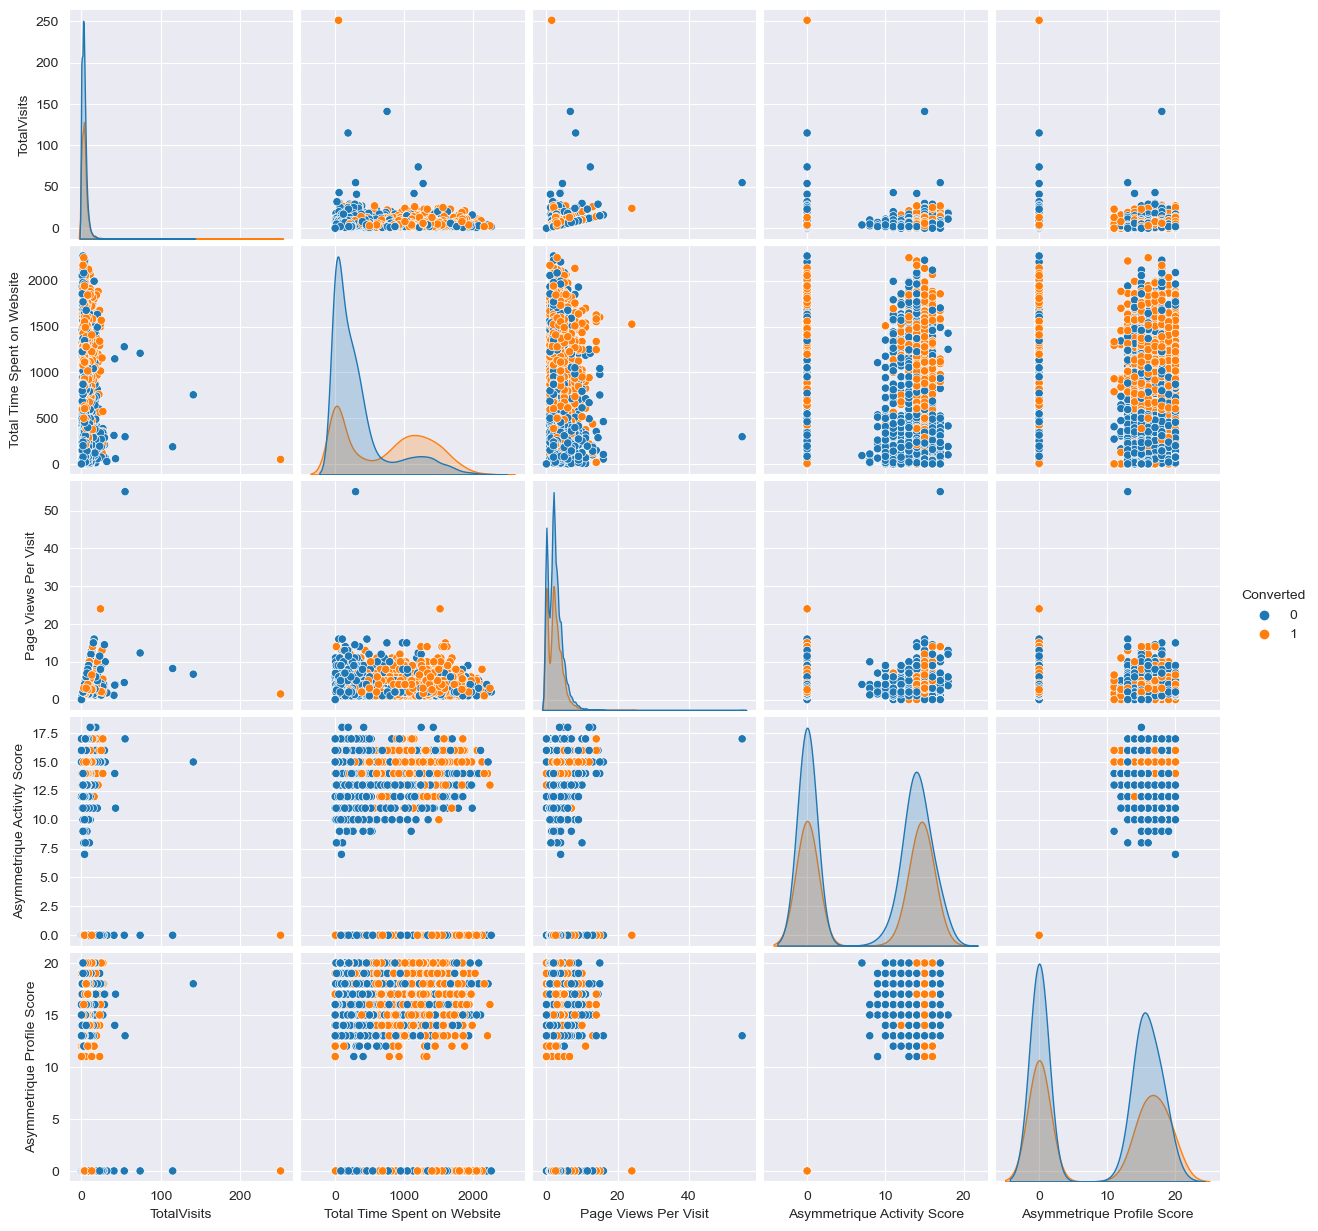

In [270]:
sns.pairplot(leadscore,diag_kind='kde',hue='Converted')
plt.show()

- Increase in Total Time spent on Website increases the changes of Converting to Lead
- As total visits increase, Profile tends to become a Lead
- Activity score increases as the time spent on Website increases and increases the changes of Converting to Lead

In [271]:
continuous_features

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

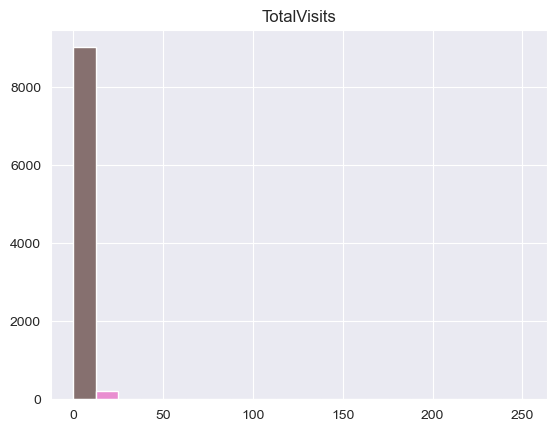

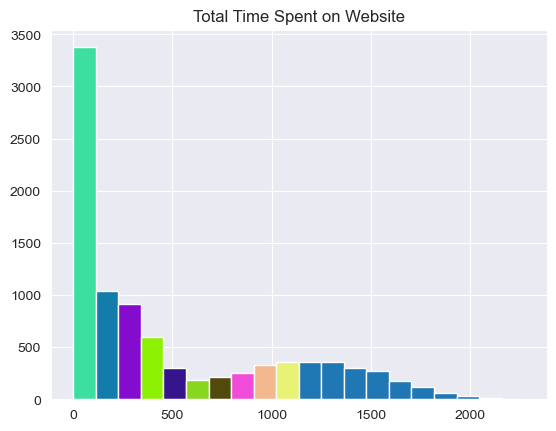

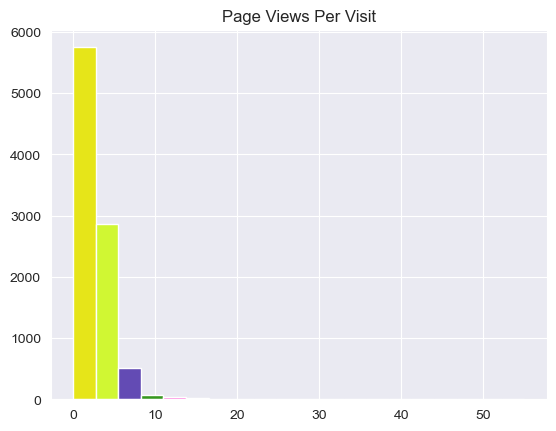

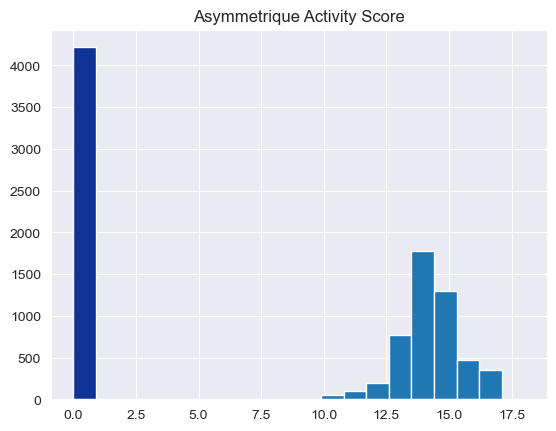

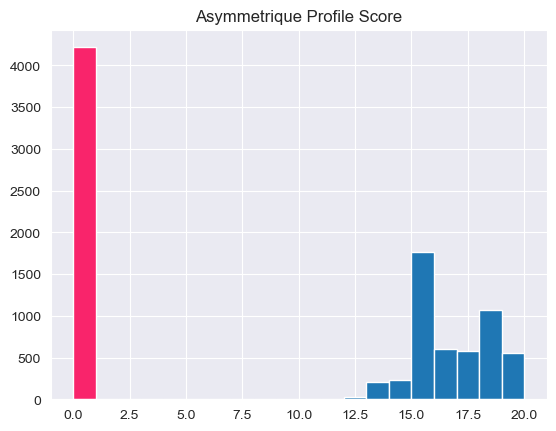

In [272]:
for i in continuous_features:
    sns.set_style("darkgrid")
    fig, ax = plt.subplots()
    N,bins,patches = ax.hist(leadscore[i],bins=20)
    plt.title(i)
    for i in range(10):
        patches[i].set_facecolor(randomcolor())
    plt.show()
    

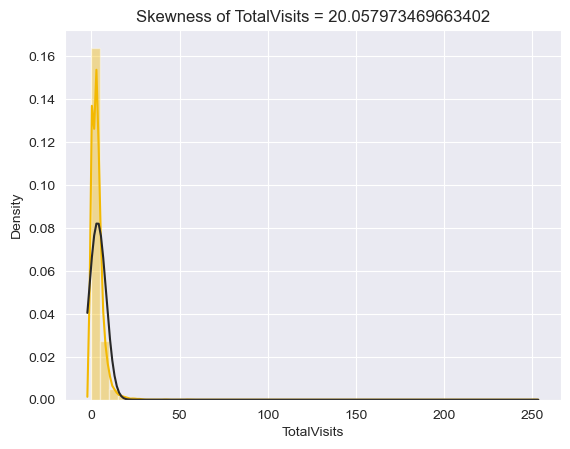

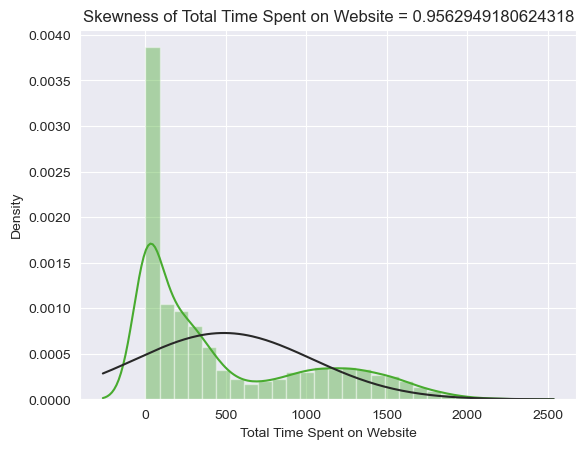

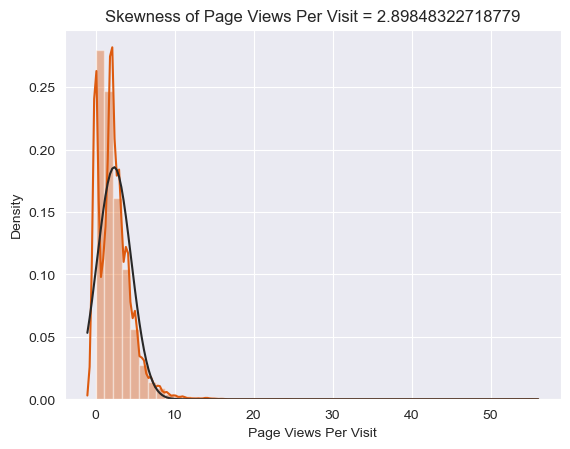

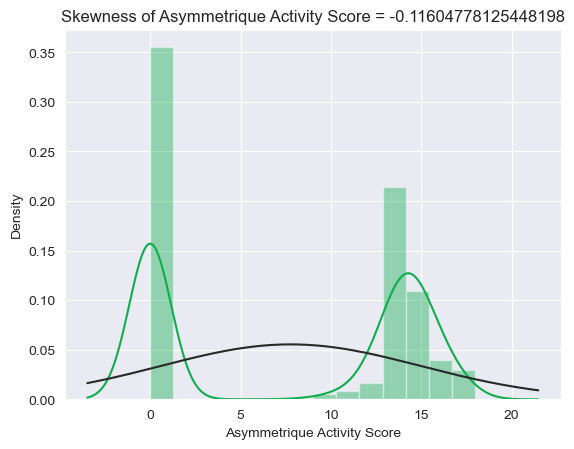

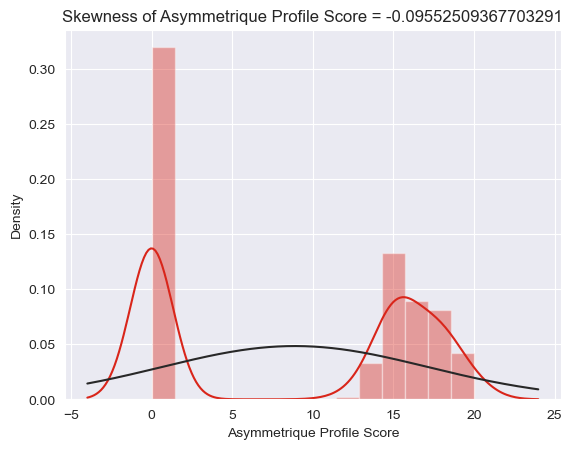

In [273]:
for i in continuous_features:
    skewness = str(skew(leadscore[i]))
    sns.distplot(leadscore[i],fit = norm,color = randomcolor())
    plt.title("Skewness of " + i + ' = '+ skewness)
    plt.show()

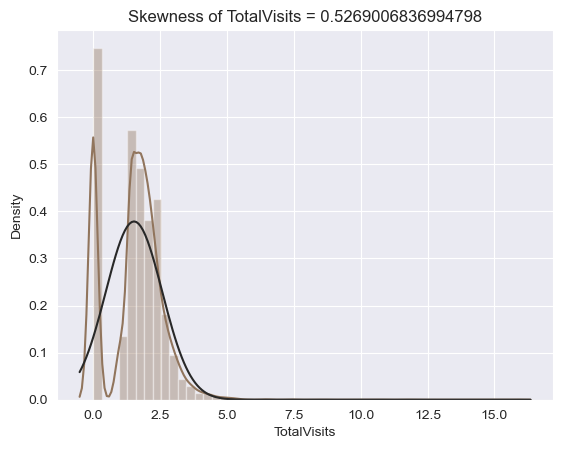

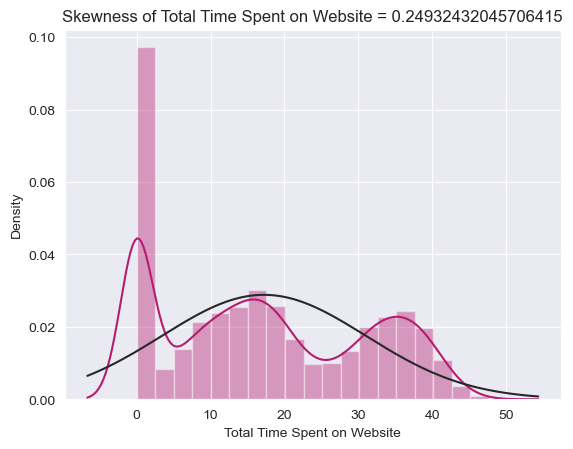

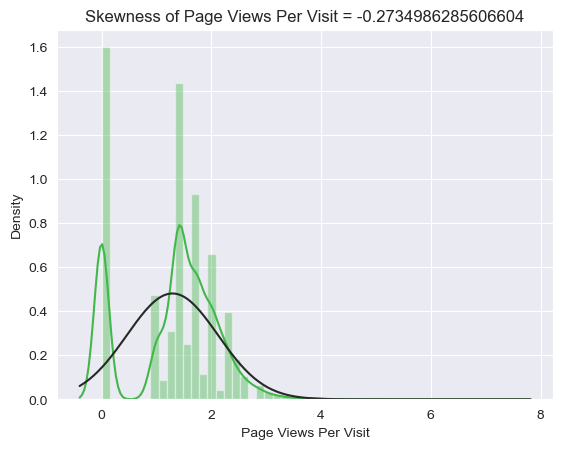

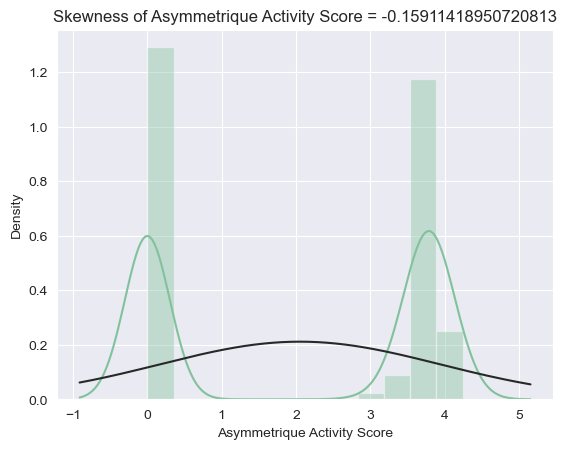

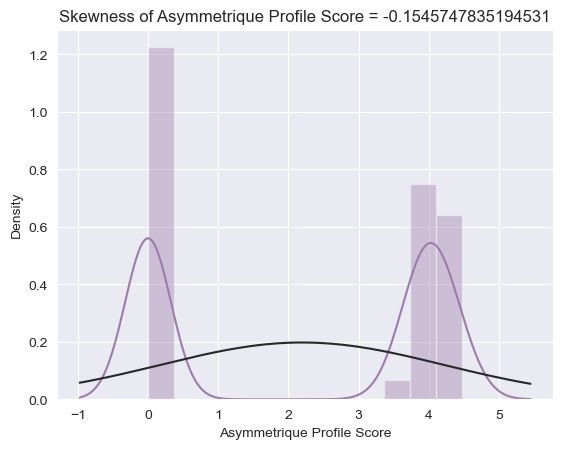

In [274]:
for i in continuous_features:
    leadscore[i] = np.sqrt(leadscore[i])
    skewness = str(skew(leadscore[i]))
    sns.distplot(leadscore[i],fit = norm,color = randomcolor())
    plt.title("Skewness of " +i + ' = '+ skewness)
    plt.show()

##### Categorical Features

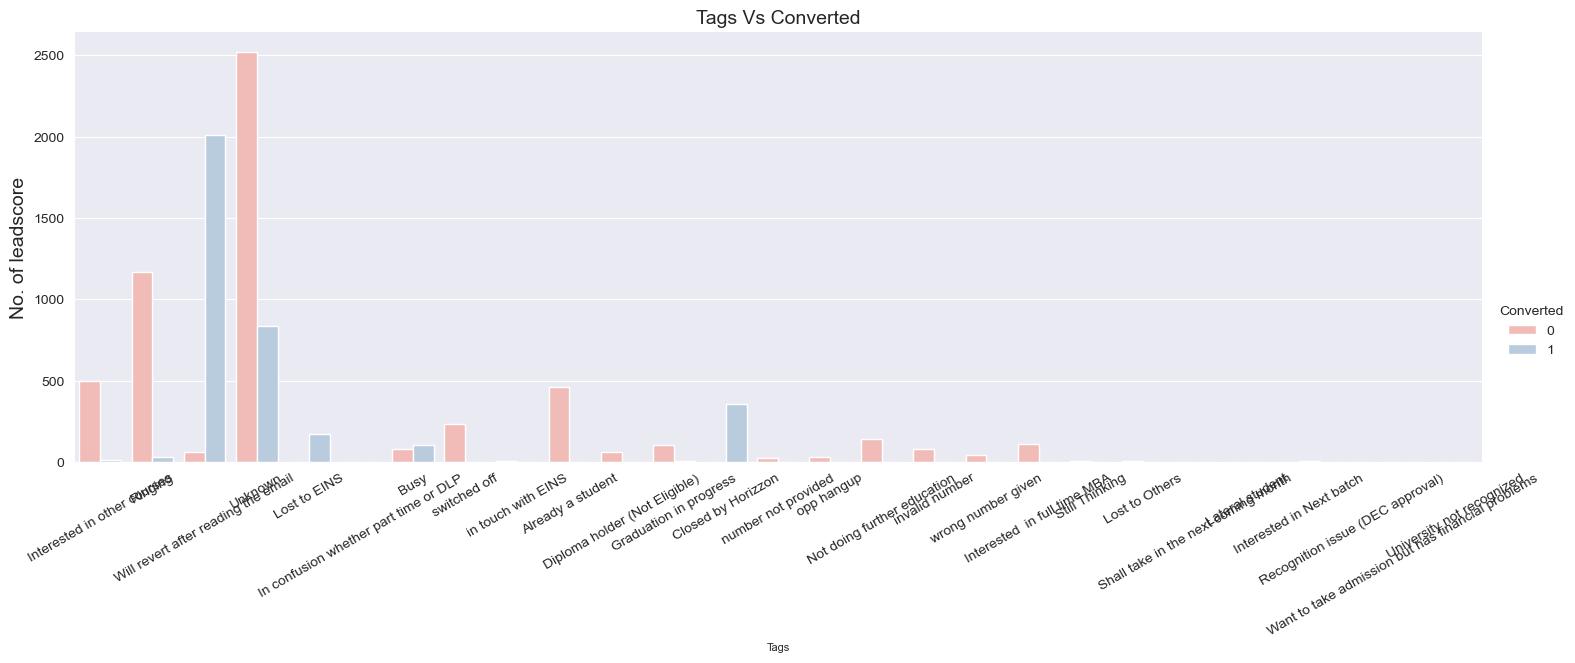

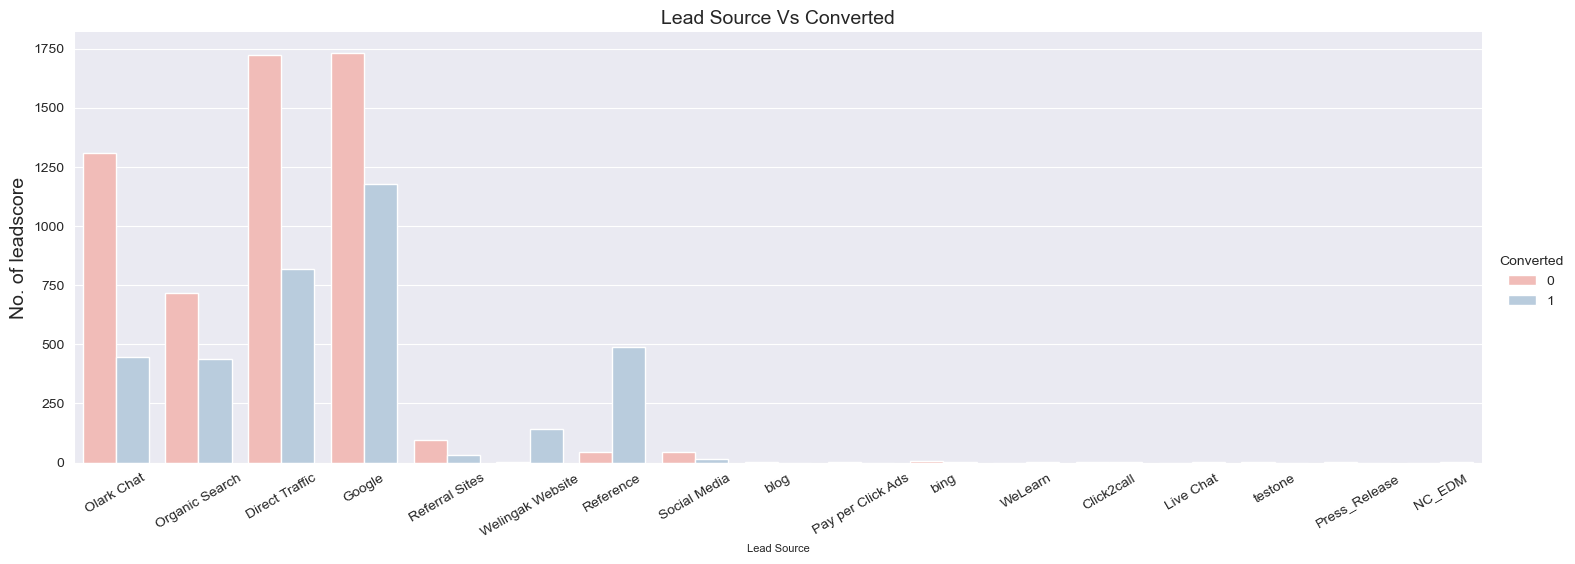

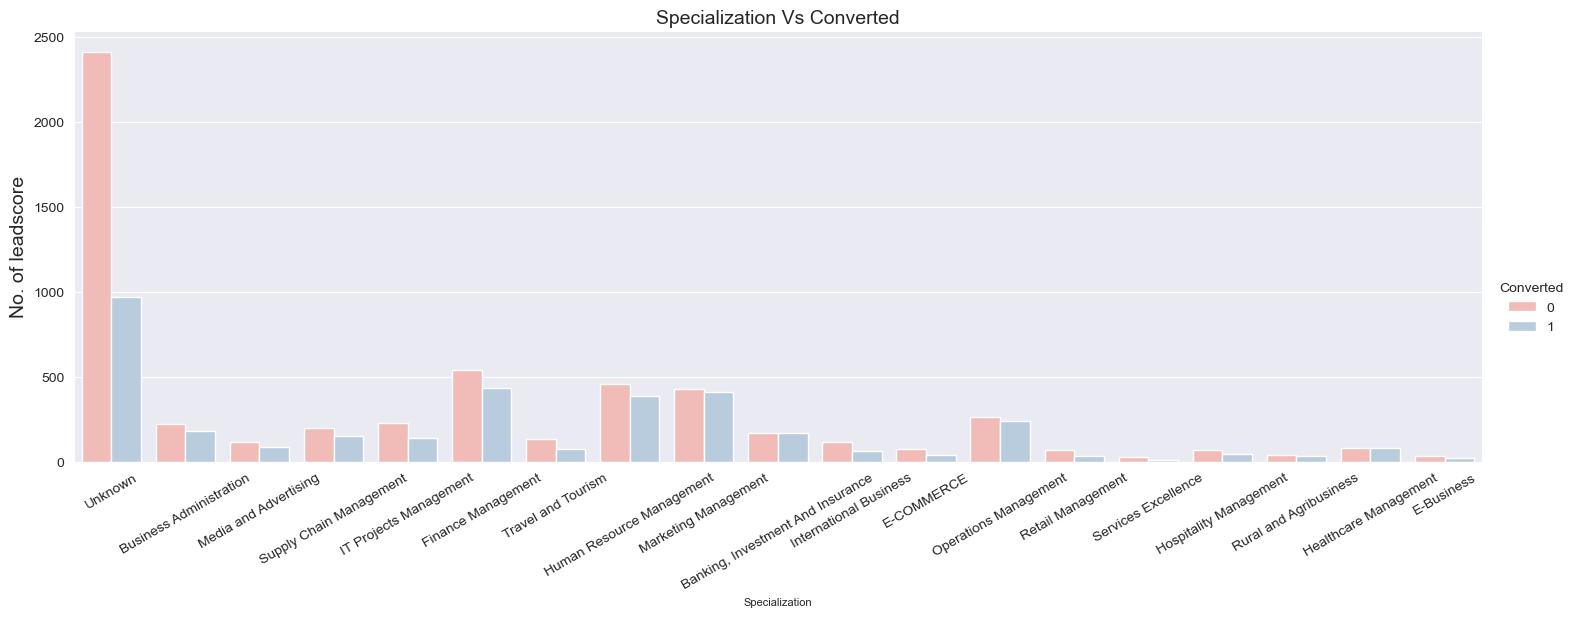

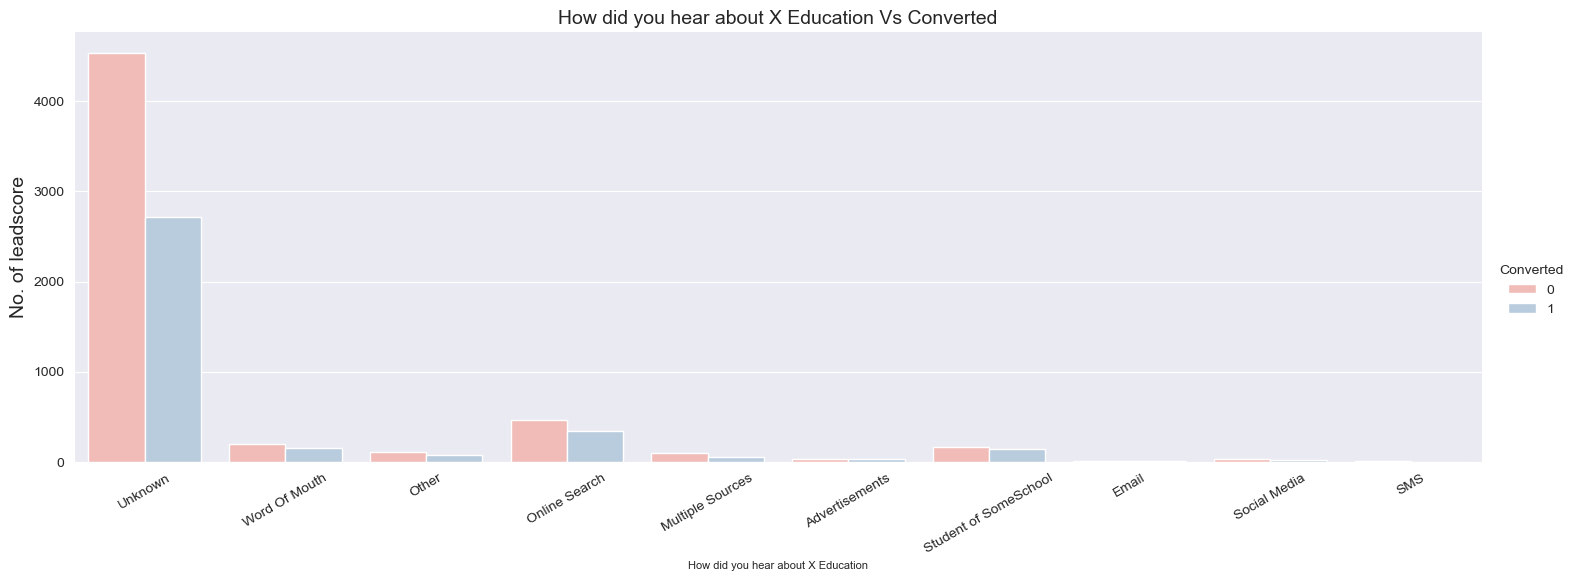

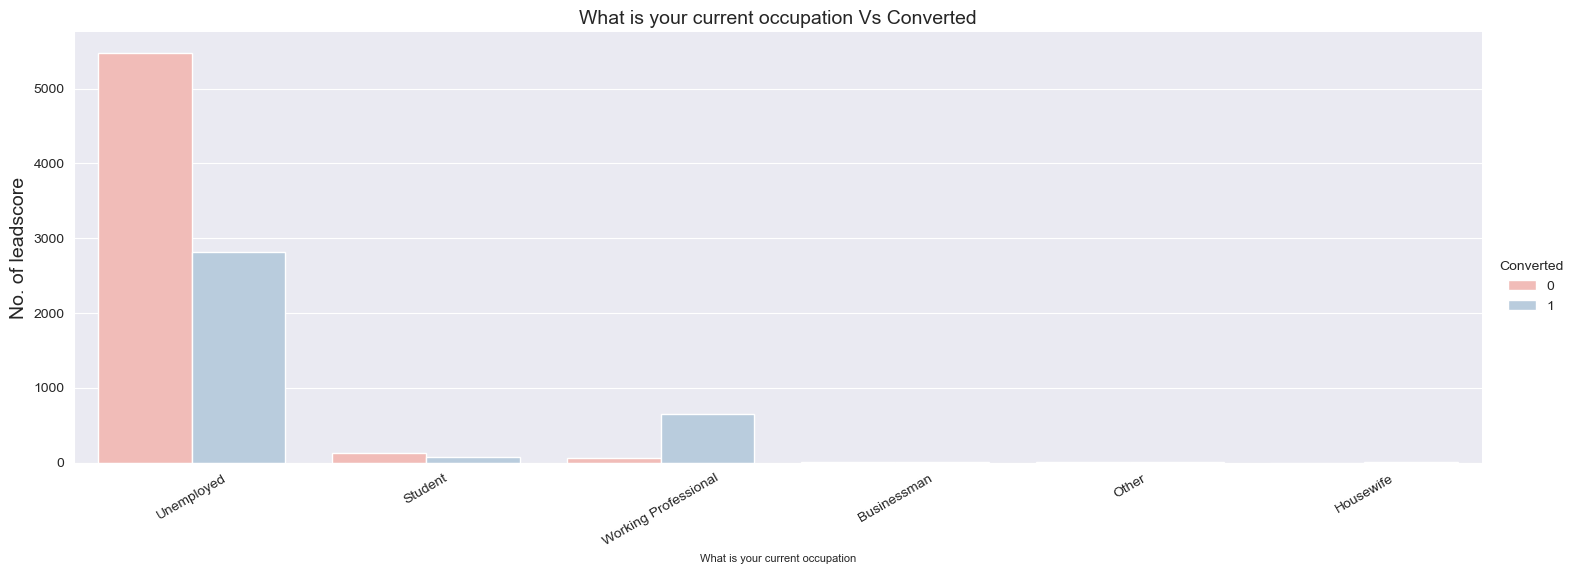

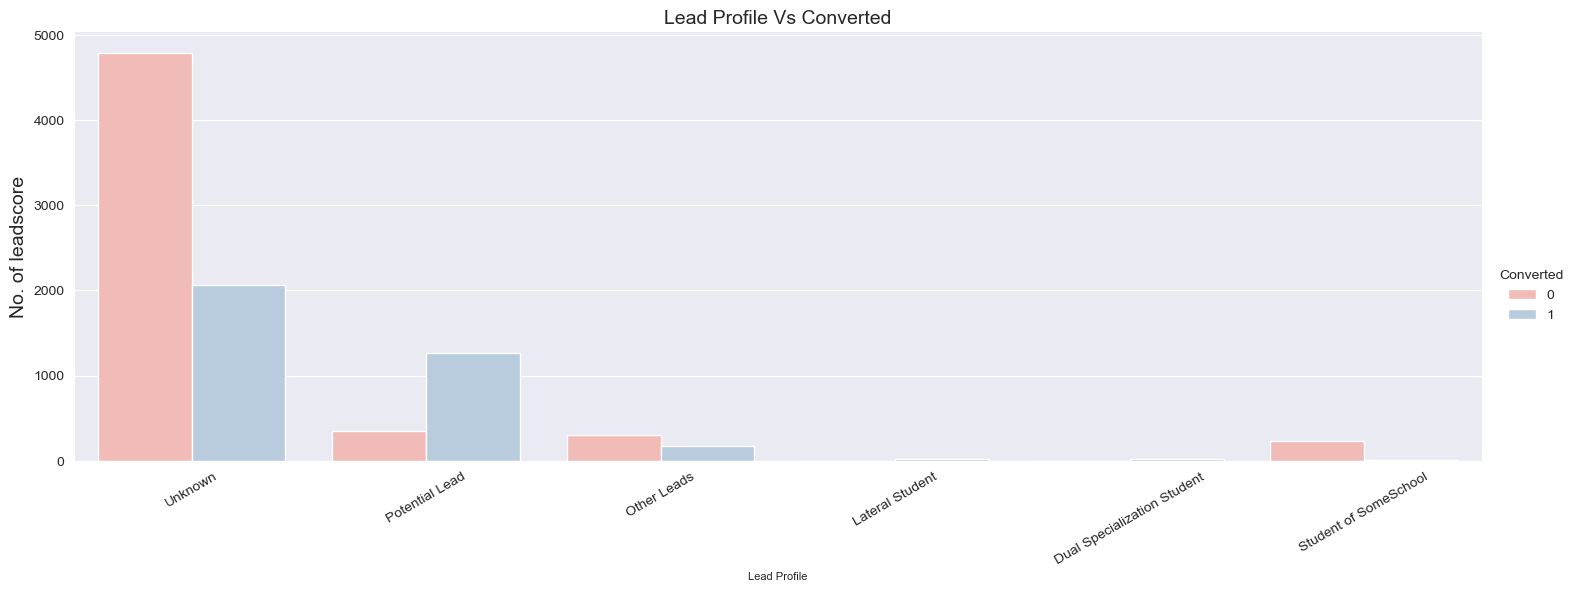

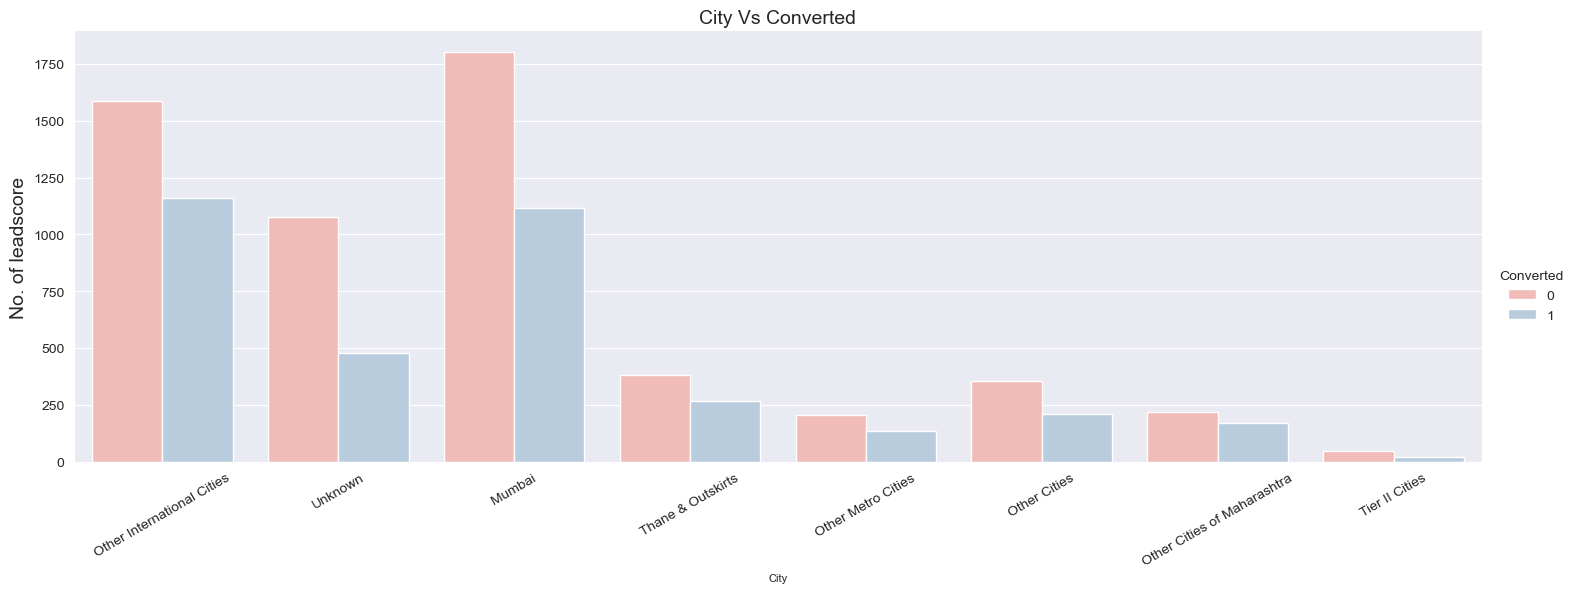

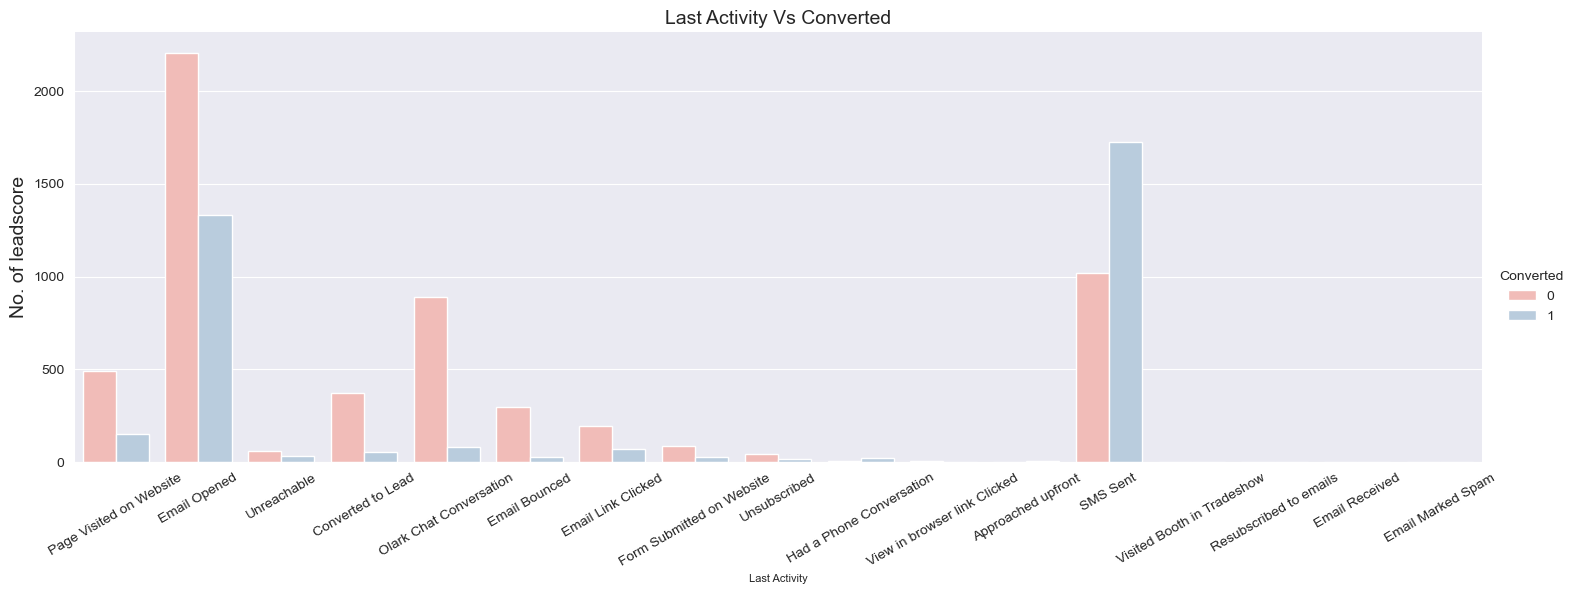

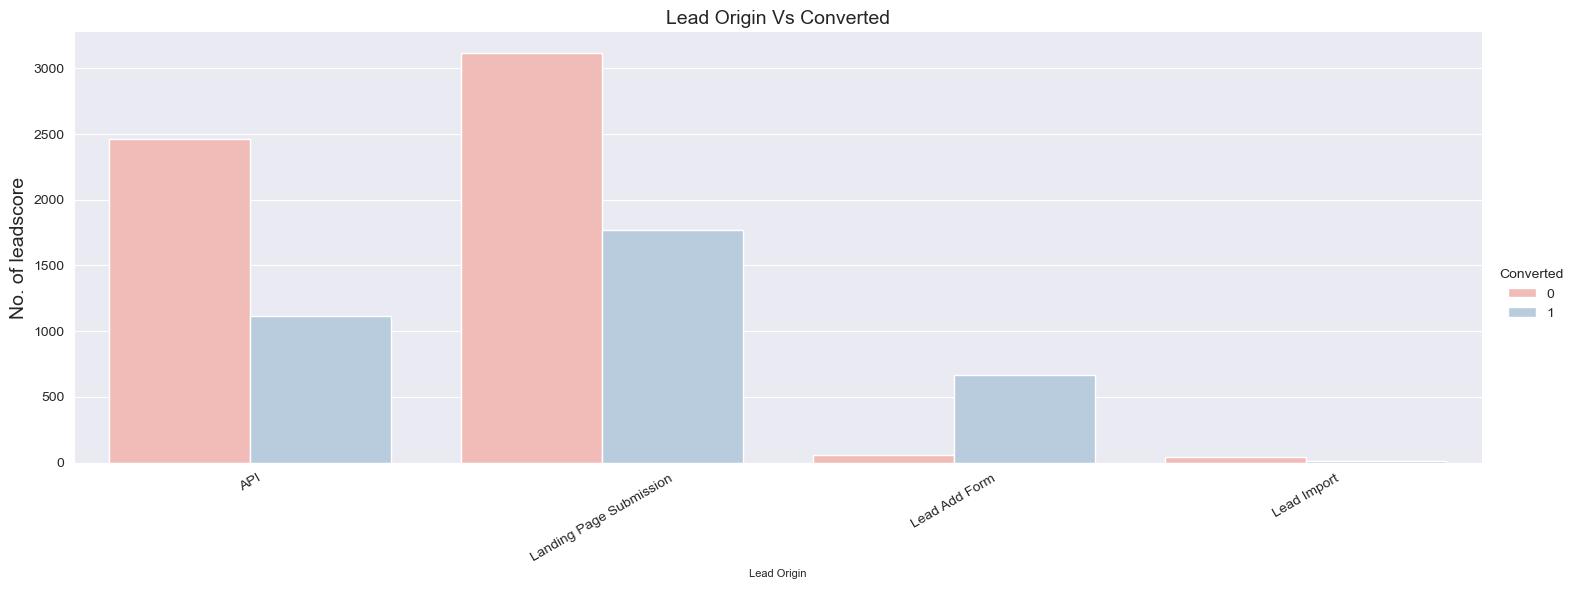

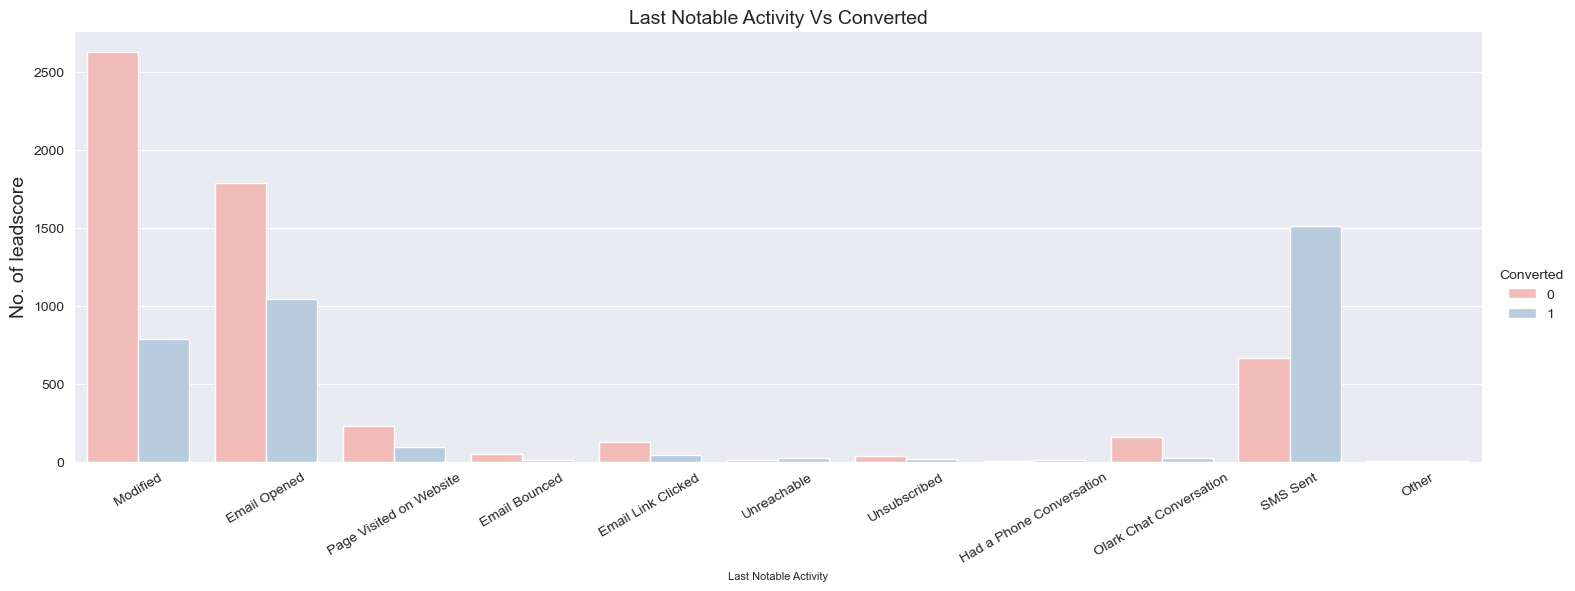

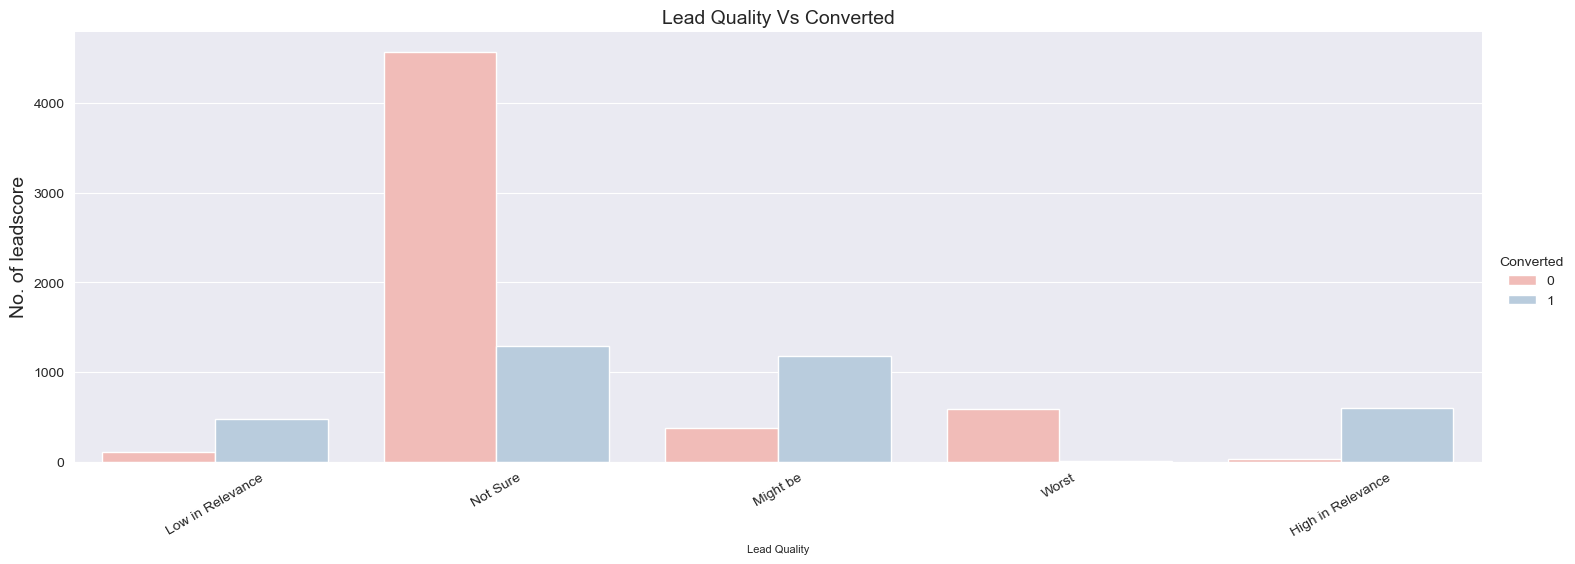

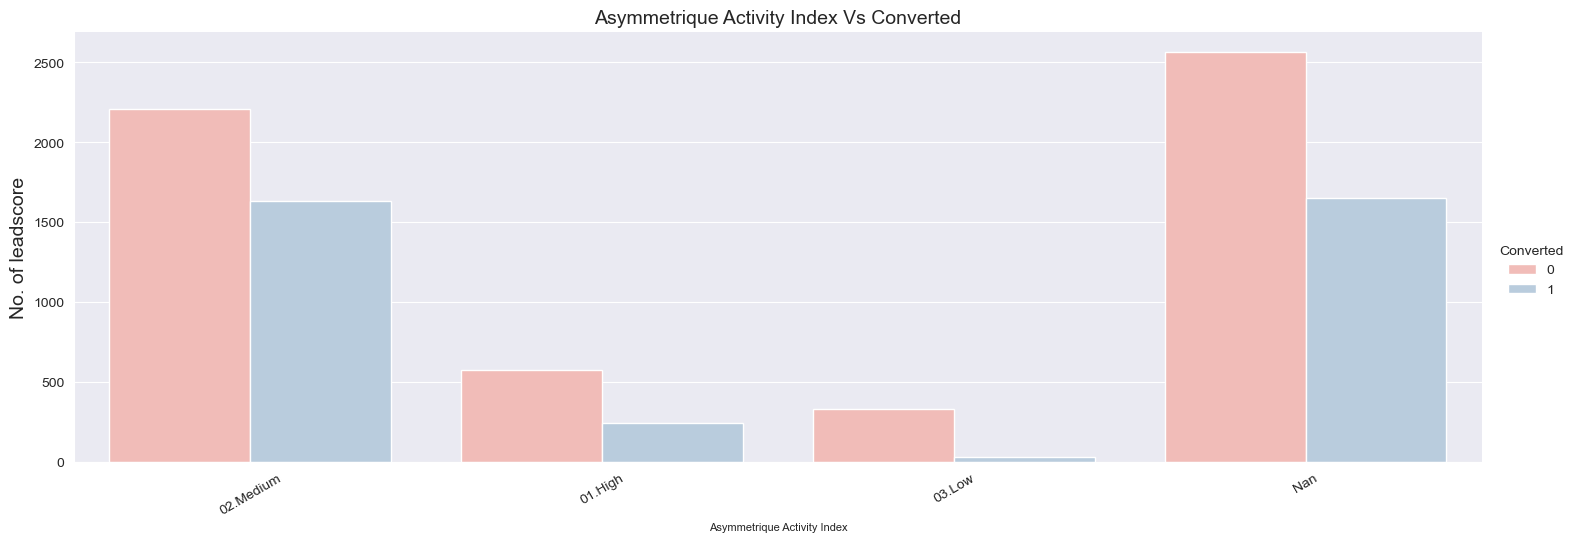

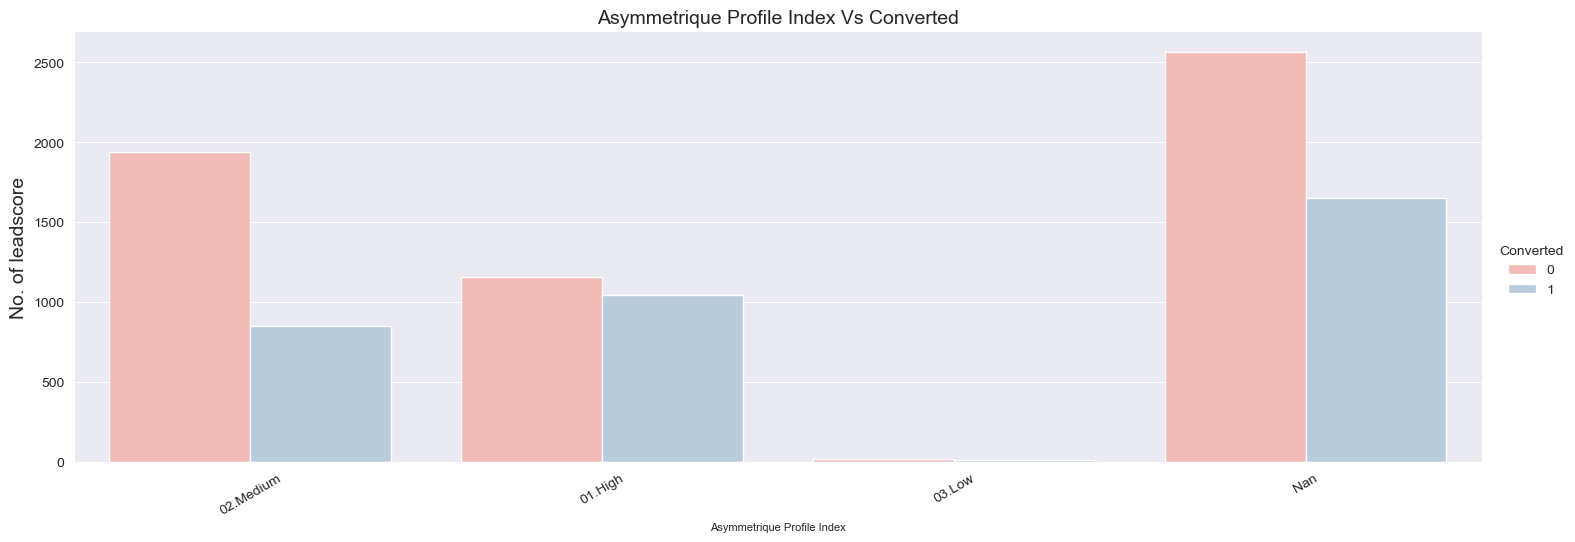

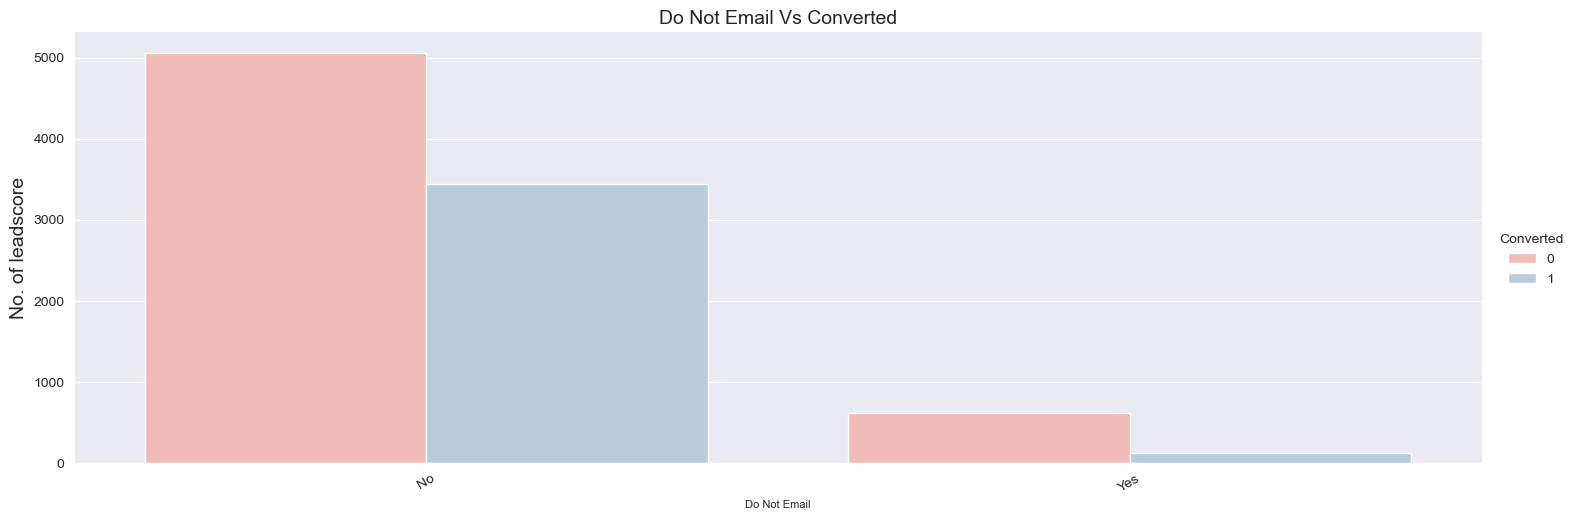

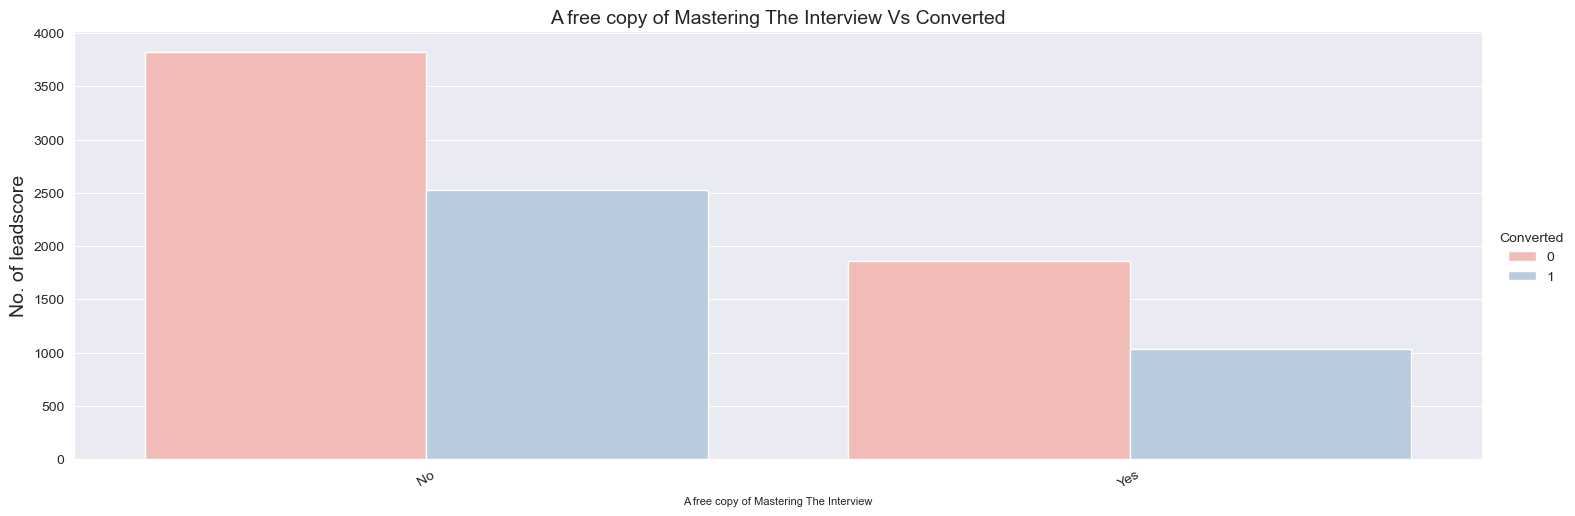

In [275]:
# categorical_columns = leadscore.select_dtypes(include='object')
for i in categorical_data:
    plt.rcParams.update({'font.size': 10})
    plot = sns.catplot(x=i, hue = "Converted", kind="count", data=leadscore, palette="Pastel1", aspect = 3);
    plt.title(i+' Vs Converted', fontsize = 14)
    plt.xlabel(i, fontsize = 8)
    plt.ylabel("No. of leadscore", fontsize = 14)
    plt.xticks(rotation=30)
    plt.show()

- 'Tags' - Higest number of Converts are from Unknown categories, we marked these category as 'Unknown in case of select. If we make this field mandatory we can come up with strategy to target specific tags

- 'Lead Source' - Google and Direct help in getting intereseted people so we can concentrate on these categories more

- 'Specialization' - Higest number of Converts are from Unknown categories, we marked these category as 'Unknown in case of select. If we make this field mandatory we can come up with strategy to target specific Specilization. 

- 'How did you hear about X Education' - Higest number of Converts are from Unknown categories, we marked these category as 'Unknown in case of select. If we make this field mandatory we can come up with strategy to target specific How did you hear about X Education. 

- 'What is your current occupation' - Unemployed people tend to Convert to lead probably because they want to learn a new skill

- 'Lead Profile' - 
- 'City' -  Specifically Mumbai tends to have more Leads
- 'Last Activity' - SMS and Email tends to attract more number of Leads
- 'Lead Origin' - Landing Page Submission and API can improve number of leads
- 'Last Notable Activity' - Modified, Email and SMS can give high number of leads
- 'Lead Quality' - People who are not Sure can be converted to more candidates with some amount of push from staff or attractive offers
- 'Asymmetrique Activity Index' - 
- 'Asymmetrique Profile Index'
- 'Do Not Email' - People tend to not like Emails to notify about the product
- 'A free copy of Mastering The Interview'

#### Outlier Handing

In [276]:
leadscore.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.000000,0.000000,0.000000,Page Visited on Website,India,...,No,Unknown,Other International Cities,02.Medium,02.Medium,3.872983,3.872983,No,No,Modified
1,API,Organic Search,No,No,0,2.236068,25.961510,1.581139,Email Opened,India,...,No,Unknown,Unknown,02.Medium,02.Medium,3.872983,3.872983,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,1.414214,39.140772,1.414214,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,3.741657,4.472136,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.000000,17.464249,1.000000,Unreachable,India,...,No,Unknown,Mumbai,02.Medium,01.High,3.605551,4.123106,No,No,Modified
4,Landing Page Submission,Google,No,No,1,1.414214,37.788887,1.000000,Converted to Lead,India,...,No,Unknown,Mumbai,02.Medium,01.High,3.872983,4.242641,No,No,Modified


In [277]:
continuous_features = ['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']

In [278]:
for column in continuous_features:
    print(column, "->", leadscore[column].skew())

TotalVisits -> 0.5269862372713761
Total Time Spent on Website -> 0.24936480358194063
Page Views Per Visit -> -0.2735430369004215


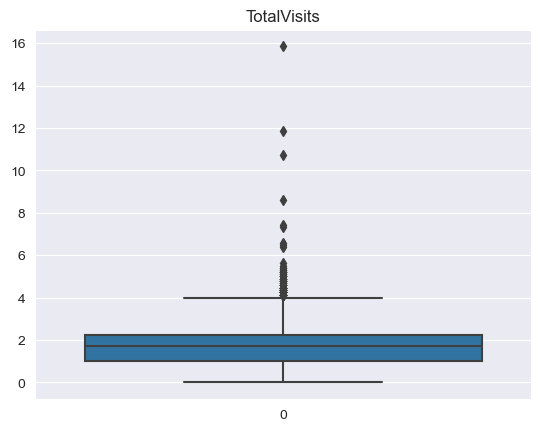

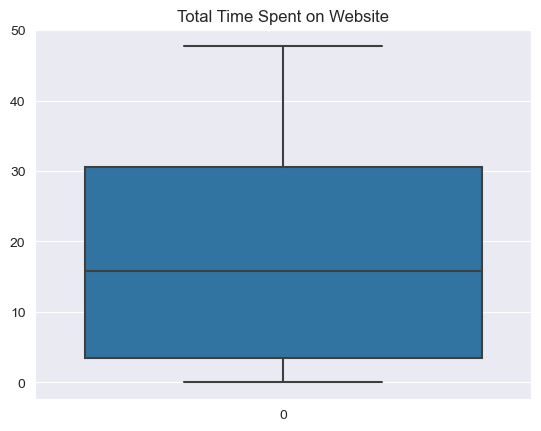

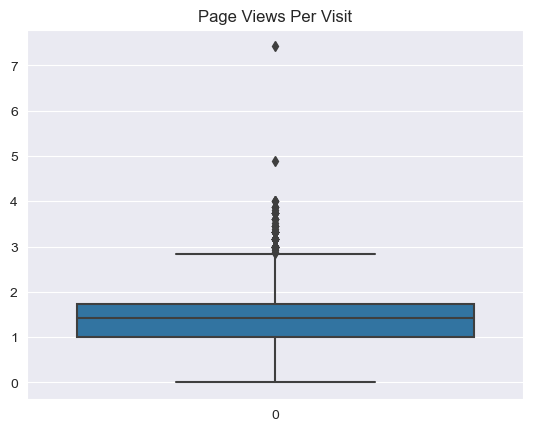

In [279]:
# checking for outliers
for i in continuous_features:
    sns.boxplot(leadscore[i])
    plt.title(i)
    plt.show()

In [280]:
continuous_features

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [281]:
print("skewness of each column after Outlier Handling")
for column in continuous_features:
    Q1= np.percentile(leadscore[column], 25,interpolation = 'midpoint')
    Q3 = np.percentile(leadscore[column], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    
    median = leadscore[column].quantile(0.50)
    leadscore[column] = np.where(leadscore[column] <=(Q1-1.5*IQR), median,leadscore[column])
    leadscore[column] = np.where(leadscore[column] >=(Q3+1.5*IQR), median,leadscore[column])
    print(column, "->", leadscore[column].skew())

skewness of each column after Outlier Handling
TotalVisits -> -0.23174091348200848
Total Time Spent on Website -> 0.24936480358194063
Page Views Per Visit -> -0.48552606649821833


There is a decrease in the amount of skewness

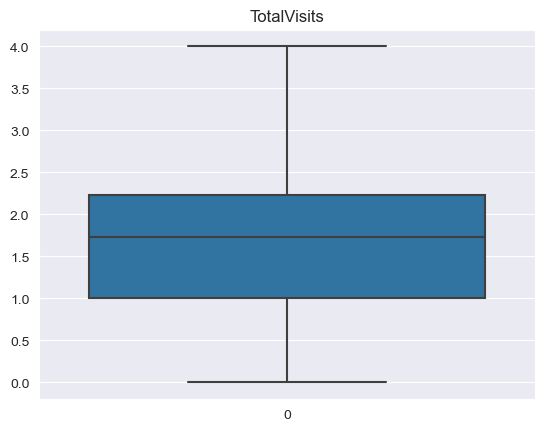

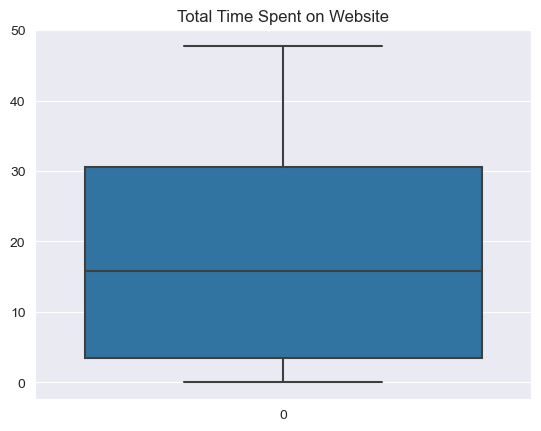

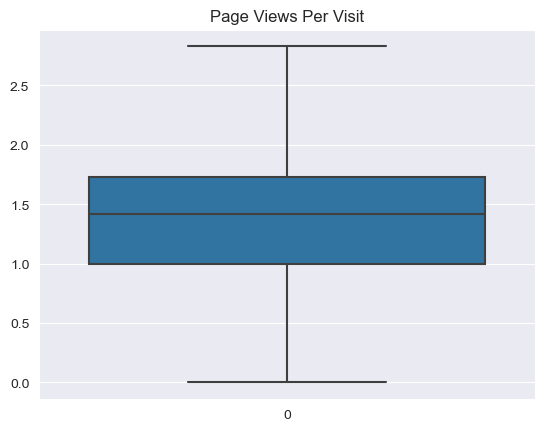

In [283]:
for i in continuous_features:
    sns.boxplot(leadscore[i])
    plt.title(i)
    plt.show()

In [284]:
len(columns_drop)

16

In [285]:
leadscore.shape

(9240, 35)

#### Train Test Split

In [448]:
X = leadscore.drop(columns=["Converted"])
y = leadscore["Converted"]

In [449]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [450]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7392, 12)
(7392,)
(1848, 12)
(1848,)


### Data Preparation and selection

In [451]:
X_train.columns

Index(['Lead Origin', 'Lead Source', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [452]:
continuous_features = X_train.select_dtypes(exclude='object').columns
continuous_features

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

In [453]:
categorical_columns = X_train.select_dtypes(include='object').columns
categorical_columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [454]:
X_train[categorical_columns].head()

,Lead Origin,Lead Source,Last Activity,Specialization,How did you hear about X Education,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
5321,Landing Page Submission,Google,Email Opened,IT Projects Management,Online Search,Unknown,Mumbai,No,Email Opened
2575,Lead Add Form,Reference,SMS Sent,Business Administration,Unknown,Potential Lead,Thane & Outskirts,No,SMS Sent
3363,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Select,Select,Other Cities of Maharashtra,Yes,Email Opened
955,API,Referral Sites,Olark Chat Conversation,Unknown,Unknown,Unknown,Unknown,No,Modified
6406,Landing Page Submission,Direct Traffic,Converted to Lead,Business Administration,Select,Select,Mumbai,Yes,Modified


##### binary Features

In [455]:
binary_features = ["A free copy of Mastering The Interview"]

In [456]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
binary_data = X_train[binary_features].apply(binary_map)
binary_data.reset_index(inplace=True, drop=True)
binary_data.head()

,A free copy of Mastering The Interview
0,0
1,0
2,1
3,0
4,1


In [457]:
binary_data_test = X_test[binary_features].apply(binary_map)
binary_data_test.reset_index(inplace=True, drop=True)
binary_data_test.head()

,A free copy of Mastering The Interview
0,0
1,0
2,1
3,0
4,0


##### Non Binary Features

In [458]:
categorical_columns = X_train.select_dtypes(include='object').columns
categorical_columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [459]:
ohe = OneHotEncoder(use_cat_names=True)
encoded_data = ohe.fit_transform(X_train[categorical_columns])
encoded_data_test = ohe.transform(X_test[categorical_columns])

In [460]:
encoded_data.reset_index(inplace=True, drop=True)
encoded_data_test.reset_index(inplace=True, drop=True)

In [461]:
encoded_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_API,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Reference,Lead Source_Direct Traffic,Lead Source_Referral Sites,Lead Source_Organic Search,...,Last Notable Activity_Email Bounced,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_Email Marked Spam,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_View in browser link Clicked,Last Notable Activity_Approached upfront,Last Notable Activity_Email Received
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [462]:
pickle.dump(ohe, open('models/oneHotEncoding.pkl', 'wb'))

In [463]:
X_train.isna().sum() 

Lead Origin                               0
Lead Source                               0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
How did you hear about X Education        0
Lead Profile                              0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [464]:
X_test.isna().sum() 

Lead Origin                               0
Lead Source                               0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
How did you hear about X Education        0
Lead Profile                              0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

#### Continuous

In [465]:
X_train[continuous_features].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
5321,1.414214,3.931873,1.414214
2575,1.316074,0.000000,1.189207
3363,1.189207,4.057349,1.189207
955,1.681793,2.672345,1.414214
6406,1.000000,3.121986,1.000000


In [466]:
X_train.head()

,Lead Origin,Lead Source,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
5321,Landing Page Submission,Google,1.414214,3.931873,1.414214,Email Opened,IT Projects Management,Online Search,Unknown,Mumbai,No,Email Opened
2575,Lead Add Form,Reference,1.316074,0.000000,1.189207,SMS Sent,Business Administration,Unknown,Potential Lead,Thane & Outskirts,No,SMS Sent
3363,Landing Page Submission,Direct Traffic,1.189207,4.057349,1.189207,Email Opened,Business Administration,Select,Select,Other Cities of Maharashtra,Yes,Email Opened
955,API,Referral Sites,1.681793,2.672345,1.414214,Olark Chat Conversation,Unknown,Unknown,Unknown,Unknown,No,Modified
6406,Landing Page Submission,Direct Traffic,1.000000,3.121986,1.000000,Converted to Lead,Business Administration,Select,Select,Mumbai,Yes,Modified


#### Standardize the Data

In [467]:
sc = StandardScaler()
continuous_data=pd.DataFrame(sc.fit_transform(X_train[continuous_features]), columns=X_train[continuous_features].columns)
continuous_data

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0.205465,0.195373,0.995975
1,-0.299305,-1.556144,-0.477936
2,-0.951831,0.251268,-0.477936
3,1.581728,-0.365704,0.995975
4,-1.924996,-0.165405,-1.717342
...,...,...,...
7387,0.205465,0.552439,0.995975
7388,-0.299305,0.232641,0.353109
7389,-0.951831,0.251268,-1.717342
7390,-0.951831,0.488702,-0.477936


In [468]:
continuous_data_test=pd.DataFrame(sc.transform(X_test[continuous_features]), columns=X_test[continuous_features].columns)
continuous_data_test

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,-0.299305,-1.556144,-0.477936
1,0.205465,1.217525,-0.477936
2,-0.299305,0.963794,-1.018519
3,-0.951831,0.088959,-0.477936
4,2.698029,1.314717,0.527358
...,...,...,...
1843,0.981453,0.145661,1.984260
1844,-0.299305,-1.556144,-0.477936
1845,-0.951831,-0.560051,-0.477936
1846,-0.299305,-1.556144,-0.477936


In [469]:
pickle.dump(ohe, open('models/standardScaler.pkl', 'wb'))

#### Concatinate All Data

In [470]:
X_train.head()

,Lead Origin,Lead Source,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
5321,Landing Page Submission,Google,1.414214,3.931873,1.414214,Email Opened,IT Projects Management,Online Search,Unknown,Mumbai,No,Email Opened
2575,Lead Add Form,Reference,1.316074,0.000000,1.189207,SMS Sent,Business Administration,Unknown,Potential Lead,Thane & Outskirts,No,SMS Sent
3363,Landing Page Submission,Direct Traffic,1.189207,4.057349,1.189207,Email Opened,Business Administration,Select,Select,Other Cities of Maharashtra,Yes,Email Opened
955,API,Referral Sites,1.681793,2.672345,1.414214,Olark Chat Conversation,Unknown,Unknown,Unknown,Unknown,No,Modified
6406,Landing Page Submission,Direct Traffic,1.000000,3.121986,1.000000,Converted to Lead,Business Administration,Select,Select,Mumbai,Yes,Modified


In [471]:
X_train = pd.concat([binary_data, encoded_data, continuous_data], axis=1)
X_train.head()

,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_API,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Reference,Lead Source_Direct Traffic,Lead Source_Referral Sites,...,Last Notable Activity_Email Marked Spam,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_View in browser link Clicked,Last Notable Activity_Approached upfront,Last Notable Activity_Email Received,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.205465,0.195373,0.995975
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,-0.299305,-1.556144,-0.477936
2,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,-0.951831,0.251268,-0.477936
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1.581728,-0.365704,0.995975
4,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,-1.924996,-0.165405,-1.717342


In [472]:
X_test = pd.concat([binary_data_test, encoded_data_test, continuous_data_test], axis=1)
X_test.head()

,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_API,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Reference,Lead Source_Direct Traffic,Lead Source_Referral Sites,...,Last Notable Activity_Email Marked Spam,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_View in browser link Clicked,Last Notable Activity_Approached upfront,Last Notable Activity_Email Received,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,-0.299305,-1.556144,-0.477936
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.205465,1.217525,-0.477936
2,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,-0.299305,0.963794,-1.018519
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,-0.951831,0.088959,-0.477936
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.698029,1.314717,0.527358


In [473]:
X_train.isna().sum()

A free copy of Mastering The Interview      0
Lead Origin_Landing Page Submission         0
Lead Origin_Lead Add Form                   0
Lead Origin_API                             0
Lead Origin_Lead Import                     0
                                           ..
Last Notable Activity_Approached upfront    0
Last Notable Activity_Email Received        0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Length: 105, dtype: int64

In [474]:
X_test.isna().sum()

A free copy of Mastering The Interview      0
Lead Origin_Landing Page Submission         0
Lead Origin_Lead Add Form                   0
Lead Origin_API                             0
Lead Origin_Lead Import                     0
                                           ..
Last Notable Activity_Approached upfront    0
Last Notable Activity_Email Received        0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Length: 105, dtype: int64

#### Feature Selection

In [475]:
# Fitting Logistic model 
logit_model= LogisticRegression(solver='liblinear')
logit_model.fit(X_train, y_train)
# Rank features by importance
feature= pd.DataFrame()
feature['column']= X_train.columns
feature['importance']= logit_model.coef_[0]
feature.sort_values('importance', ascending=False, inplace=True)

In [476]:
[columns_drop.append(x) for x in feature[feature["importance"]<=0].column]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [477]:
X_train_fs=X_train[[x for x in feature[feature["importance"]>0].column]]
X_test=X_test[[x for x in feature[feature["importance"]>0].column]]
X_train_fs.head()

,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Lead Source_Olark Chat,Lead Profile_Dual Specialization Student,Last Activity_Approached upfront,Total Time Spent on Website,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable,...,A free copy of Mastering The Interview,A free copy of Mastering The Interview_Yes,City_Other Cities,City_Tier II Cities,Lead Profile_Other Leads,City_Other Metro Cities,"Specialization_Banking, Investment And Insurance",Specialization_Human Resource Management,How did you hear about X Education_Unknown,City_Mumbai
0,0,0,0,0,0,0.195373,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,-1.556144,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0.251268,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,-0.365704,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,-0.165405,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1


#### VIF

In [478]:
vif = pd.DataFrame()
vif['Features'] = X_train_fs.columns
vif['VIF'] = [variance_inflation_factor(X_train_fs.values, i) for i in range(X_train_fs.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
47,A free copy of Mastering The Interview_Yes,inf
46,A free copy of Mastering The Interview,inf
43,Last Activity_Email Marked Spam,inf
42,Last Notable Activity_Email Marked Spam,inf
12,Last Notable Activity_Resubscribed to emails,inf
13,Last Activity_Resubscribed to emails,inf
0,Lead Origin_Lead Add Form,18.29
20,A free copy of Mastering The Interview_No,16.05
36,Lead Source_Reference,14.41
1,Lead Source_Welingak Website,4.85


In [479]:
[columns_drop.append(x) for x in list(vif[vif['VIF']>=5]['Features'])]

[None, None, None, None, None, None, None, None, None]

In [480]:
len(columns_drop)

193

In [481]:
X_train_vif = X_train_fs[[x for x in list(vif[vif['VIF']<5]['Features'])]]
X_test_vif = X_test[[x for x in list(vif[vif['VIF']<5]['Features'])]]

In [482]:
X_train_vif.shape

(7392, 47)

In [483]:
X_test_vif.shape

(1848, 47)

#### PCA

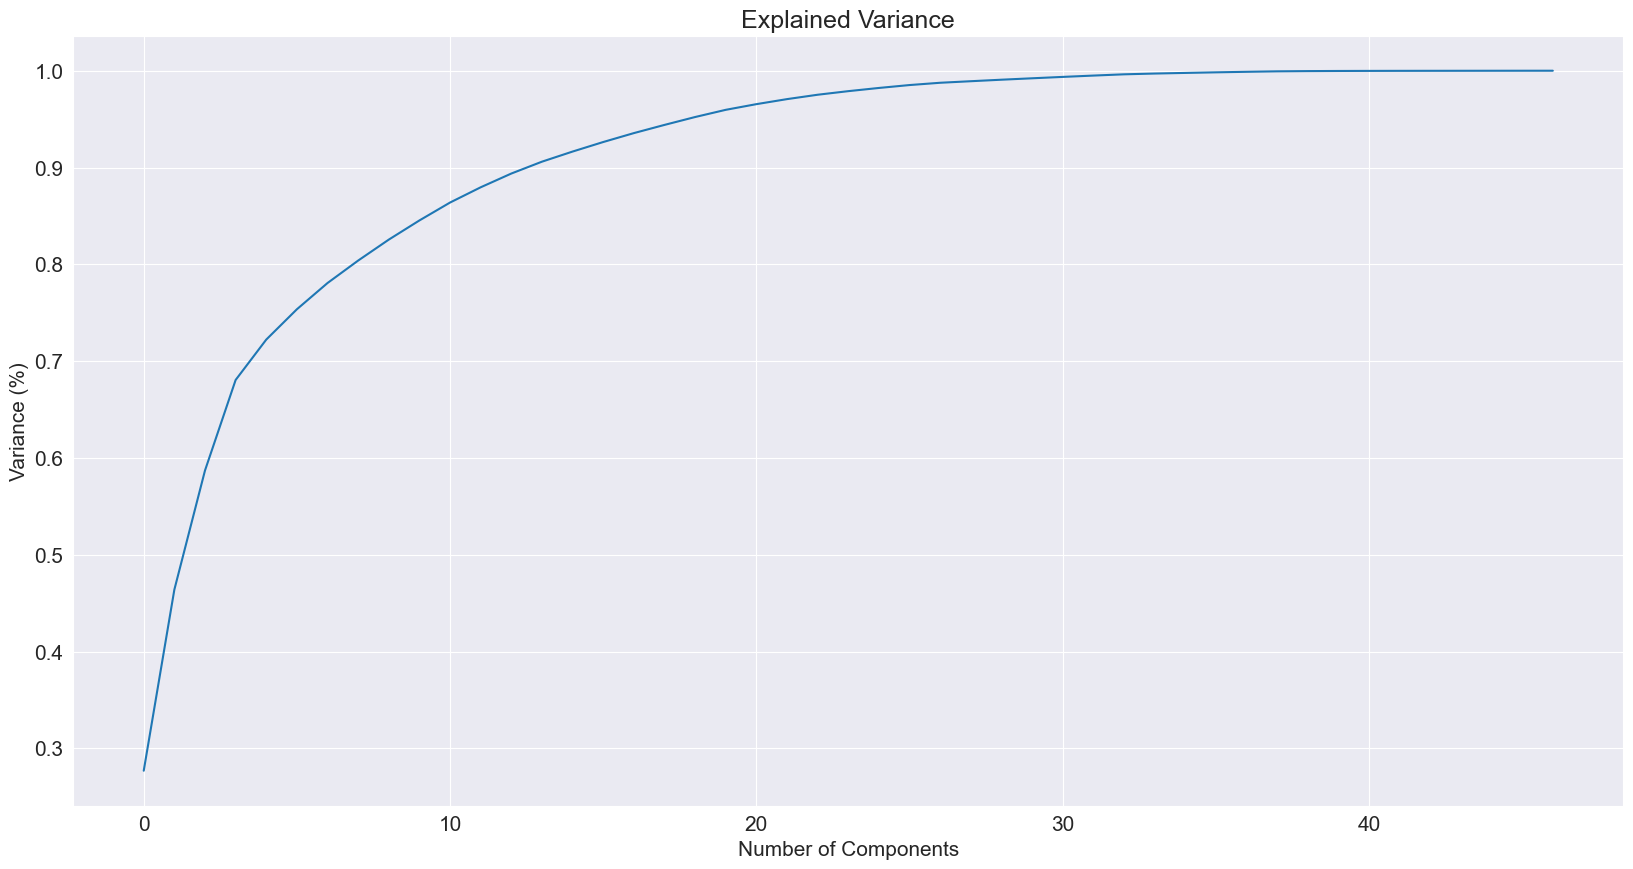

In [484]:
pca = PCA()
principalComponents = pca.fit_transform(X_train_vif)
plt.figure(figsize=(20,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [485]:
comp_count = 15
pca_columns = []
for i in range(1,comp_count+1):
    pca_columns.append("PC"+str(i))

In [486]:

pca = PCA(n_components=comp_count)
new_data = pca.fit_transform(X_train_vif)
# This will be the new data fed to the algorithm.
X_train_pca = pd.DataFrame(data = new_data
             , columns = pca_columns)


In [487]:

new_data_test = pca.transform(X_test_vif)
# This will be the new data fed to the algorithm.
X_test_pca = pd.DataFrame(data = new_data_test
             , columns = pca_columns)


In [488]:
X_train_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,0.404931,0.067774,-0.784863,-0.320226,0.240784,0.065392,-0.379389,0.032694,0.141025,0.012922,0.214499,-0.058768,0.426943,-0.157325,0.405097
1,-1.247166,0.517910,1.078877,0.721121,0.693049,0.687752,0.390033,0.069321,0.124575,0.076225,-0.183116,-0.382970,0.138697,0.062437,0.111707
2,-0.364627,-0.848346,-0.797289,-0.426207,-0.682571,0.815302,-0.100630,-0.035881,-0.062291,0.022179,-0.166193,-0.299014,0.019088,0.581097,0.097112
3,0.546264,1.434130,0.855753,-0.450739,-0.491443,-0.580543,0.226727,-0.009483,-0.075949,-0.047934,0.174728,-0.351053,0.032212,-0.054385,-0.053401
4,-1.269433,-1.377595,-1.160903,0.422548,-0.203852,-0.180606,0.202728,-0.063834,-0.015130,-0.022820,-0.017916,-0.404147,-0.000109,-0.056965,-0.011029


In [489]:
pickle.dump(ohe, open('models/PCA.pkl', 'wb'))

In [513]:
model = LogisticRegression()
selector = RFE(estimator = model, n_features_to_select = 18)
selector.fit(X_train_vif, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=18)

In [517]:
X_train_vif = X_train_vif[X_train_vif.columns[selector.support_]]

In [520]:
X_test_vif = X_test_vif[X_test_vif.columns[selector.support_]]

In [521]:
X_test_vif.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,City_Unknown,Last Notable Activity_SMS Sent,Total Time Spent on Website,Lead Source_Olark Chat,Last Activity_Email Received,Last Activity_Had a Phone Conversation,Last Notable Activity_Had a Phone Conversation,Last Activity_Email Opened,Lead Profile_Potential Lead,Last Activity_Approached upfront,Lead Profile_Other Leads,Lead Source_Live Chat,Lead Origin_Quick Add Form,Lead Profile_Lateral Student,Last Notable Activity_Unreachable,Lead Profile_Dual Specialization Student
0,0,0,0,0,-1.556144,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,1,0,1,1.217525,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0.963794,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0,1,0,0,0.088959,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1.314717,0,0,0,0,1,0,0,0,0,0,0,0,0


#### Storing Columns for Prediction Pipeline

## Model Building and Performance Measure

#### Logestic Regression

In [522]:
X_test_pca.shape

(1848, 15)

In [523]:
X_train_pca.shape

(7392, 15)

In [524]:
Logit=LogisticRegression(solver='liblinear')

Logit.fit(X_train_pca,y_train)

print("Score the X-train with Y-train is : ", str(round(Logit.score(X_train_pca,y_train)*100,2)),"%")
print("Score the X-test  with Y-test  is : ", str(round(Logit.score(X_test_pca,y_test)*100,2)),"%")

Y_pred=Logit.predict(X_test_pca)
print("Accuracy is " , round(accuracy_score(y_test,Y_pred)*100,2),"%")

Score the X-train with Y-train is :  76.6 %
Score the X-test  with Y-test  is :  76.84 %
Accuracy is  76.84 %


In [525]:
tn, fp, fn, tp = confusion_matrix(y_test, Y_pred).ravel()
precision = precision_score(y_test, Y_pred)
recall = recall_score(y_test, Y_pred)
f1 = f1_score(y_test, Y_pred)
fpr = fp/ float(tn+fp)
fnr = fn/ float(tp+fn)
print("Sensitivity(True positive rate): ",recall)

print("False Positive Rate: ",fpr)

print("Specificity(True negative rate): ", tn/(tn+fp))

print("False Negative Rate: ",fnr)

print("Precision: ", precision)

print("F-Score: ",f1)

Sensitivity(True positive rate):  0.6419753086419753
False Positive Rate:  0.14924039320822163
Specificity(True negative rate):  0.8507596067917784
False Negative Rate:  0.35802469135802467
Precision:  0.7370078740157481
F-Score:  0.6862170087976539


In [526]:
Logit=LogisticRegression(solver='liblinear')

Logit.fit(X_train_vif,y_train)

print("Score the X-train with Y-train is : ", str(round(Logit.score(X_train_vif,y_train)*100,2)),"%")
print("Score the X-test  with Y-test  is : ", str(round(Logit.score(X_test_vif,y_test)*100,2)),"%")

Y_pred=Logit.predict(X_test_vif)
print("Accuracy is " , round(accuracy_score(y_test,Y_pred)*100,2),"%")

Score the X-train with Y-train is :  78.33 %
Score the X-test  with Y-test  is :  77.71 %
Accuracy is  77.71 %


In [530]:
tn, fp, fn, tp = confusion_matrix(y_test, Y_pred).ravel()
precision = precision_score(y_test, Y_pred)
recall = recall_score(y_test, Y_pred)
f1 = f1_score(y_test, Y_pred)
fpr = fp/ float(tn+fp)
fnr = fn/ float(tp+fn)
print("Sensitivity(True positive rate): ",recall)

print("False Positive Rate: ",fpr)

print("Specificity(True negative rate): ", tn/(tn+fp))

print("False Negative Rate: ",fnr)

print("Precision: ", precision)

print("F-Score: ",f1)

Sensitivity(True positive rate):  0.6419753086419753
False Positive Rate:  0.13494191242180517
Specificity(True negative rate):  0.8650580875781948
False Negative Rate:  0.35802469135802467
Precision:  0.7560581583198708
F-Score:  0.6943620178041544


Closing Logestic regression ran after VIF ignoring PCA

In [541]:
y_train_pred = Logit.predict_proba(X_train_vif)


y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Probabillity':y_train_pred[:,1]})
y_train_pred_final.head()


,Converted,Converted_Probabillity
0,0,0.196356
1,1,0.757952
2,0,0.203257
3,0,0.118519
4,0,0.059722


In [542]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Probabillity.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Probabillity,predicted
0,0,0.196356,0
1,1,0.757952,1
2,0,0.203257,0
3,0,0.118519,0
4,0,0.059722,0


##### AUC and ROC

In [543]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Probabillity.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Probabillity,predicted
0,0,0.196356,0
1,1,0.757952,1
2,0,0.203257,0
3,0,0.118519,0
4,0,0.059722,0


In [545]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Probabillity, 
                                         drop_intermediate = False )

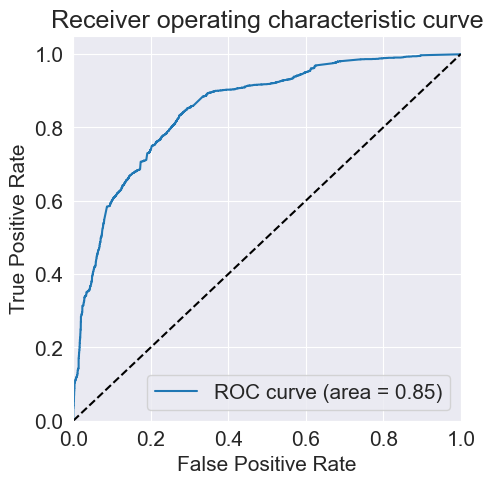

In [546]:
auc_score = roc_auc_score(y_train_pred_final.Converted,y_train_pred_final.Converted_Probabillity)
plt.figure(figsize=(5, 5))
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [548]:
nums = [float(x)/10 for x in range(10)]
for i in nums:
    y_train_pred_final[i]= y_train_pred_final.Converted_Probabillity.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Probabillity,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.196356,0,1,1,0,0,0,0,0,0,0,0
1,1,0.757952,1,1,1,1,1,1,1,1,1,0,0
2,0,0.203257,0,1,1,1,0,0,0,0,0,0,0
3,0,0.118519,0,1,1,0,0,0,0,0,0,0,0
4,0,0.059722,0,1,0,0,0,0,0,0,0,0,0


In [549]:
probabillity_cutoff = pd.DataFrame( columns = ['probabillity','accuracy','sensitivity','specificity'])

nums = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in nums:
    cm = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    probabillity_cutoff.loc[i] =[i,accuracy,sensitivity,specificity]
probabillity_cutoff

,probabillity,accuracy,sensitivity,specificity
0.0,0.0,0.383117,1.000000,0.000000
0.1,0.1,0.532873,0.985876,0.251535
0.2,0.2,0.689935,0.913136,0.551316
0.3,0.3,0.765557,0.835452,0.722149
0.4,0.4,0.774080,0.711158,0.813158
0.5,0.5,0.783279,0.657133,0.861623
0.6,0.6,0.786255,0.581215,0.913596
0.7,0.7,0.733631,0.382062,0.951974
0.8,0.8,0.723891,0.322387,0.973246
0.9,0.9,0.662744,0.139831,0.987500


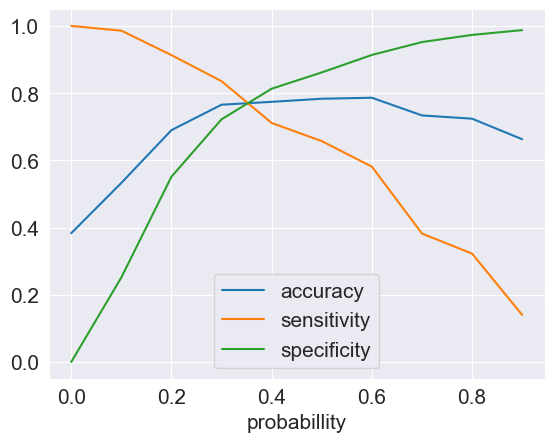

In [554]:
probabillity_cutoff.plot.line(x='probabillity', y=['accuracy','sensitivity','specificity'])
plt.show()

In [555]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Probabillity.map( lambda x: 1 if x > 0.375 else 0)
y_train_pred_final.head()

,Converted,Converted_Probabillity,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.196356,0,1,1,0,0,0,0,0,0,0,0
1,1,0.757952,1,1,1,1,1,1,1,1,1,0,0
2,0,0.203257,0,1,1,1,0,0,0,0,0,0,0
3,0,0.118519,0,1,1,0,0,0,0,0,0,0,0
4,0,0.059722,0,1,0,0,0,0,0,0,0,0,0


In [556]:
y_train_pred_final['Score'] = y_train_pred_final.Converted_Probabillity.map(lambda x: round(x*100))
y_train_pred_final

,Converted,Converted_Probabillity,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Score
0,0,0.196356,0,1,1,0,0,0,0,0,0,0,0,20
1,1,0.757952,1,1,1,1,1,1,1,1,1,0,0,76
2,0,0.203257,0,1,1,1,0,0,0,0,0,0,0,20
3,0,0.118519,0,1,1,0,0,0,0,0,0,0,0,12
4,0,0.059722,0,1,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7387,0,0.243522,0,1,1,1,0,0,0,0,0,0,0,24
7388,0,0.079507,0,1,0,0,0,0,0,0,0,0,0,8
7389,0,0.596221,1,1,1,1,1,1,1,0,0,0,0,60
7390,0,0.378599,1,1,1,1,1,0,0,0,0,0,0,38


##### Score

### SVC

In [579]:
classifier = SVC(kernel='rbf', random_state=0, probability=True)  
classifier.fit(X_train_vif, y_train) 

SVC(probability=True, random_state=0)

In [580]:

print("Score the X-train with Y-train is : ", str(round(classifier.score(X_train_vif,y_train)*100,2)),"%")
print("Score the X-test  with Y-test  is : ", str(round(classifier.score(X_test_vif,y_test)*100,2)),"%")

Y_pred=classifier.predict(X_test_vif)
print("Accuracy is " , round(accuracy_score(y_test,Y_pred)*100,2),"%")

Score the X-train with Y-train is :  82.64 %
Score the X-test  with Y-test  is :  82.41 %
Accuracy is  82.41 %


In [582]:
y_train_pred = classifier.predict_proba(X_train_vif)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Probabillity':y_train_pred[:,1]})
y_train_pred_final.head()

,Converted,Converted_Probabillity
0,0,0.134871
1,1,0.838238
2,0,0.134316
3,0,0.081759
4,0,0.140620


In [583]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Probabillity.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Probabillity,predicted
0,0,0.134871,0
1,1,0.838238,1
2,0,0.134316,0
3,0,0.081759,0
4,0,0.140620,0


#### AUC and ROC

In [584]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Probabillity.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Probabillity,predicted
0,0,0.134871,0
1,1,0.838238,1
2,0,0.134316,0
3,0,0.081759,0
4,0,0.140620,0


In [585]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Probabillity, 
                                         drop_intermediate = False )

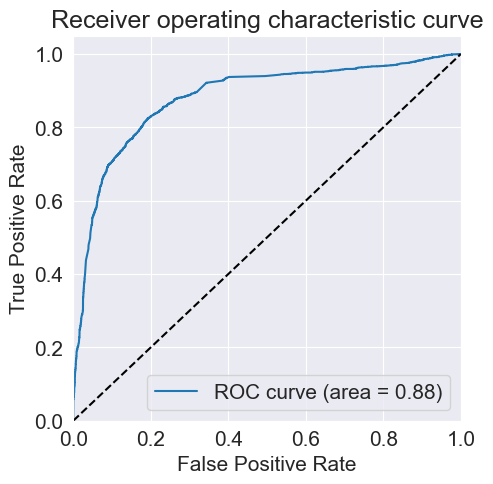

In [586]:
auc_score = roc_auc_score(y_train_pred_final.Converted,y_train_pred_final.Converted_Probabillity)
plt.figure(figsize=(5, 5))
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [587]:
nums = [float(x)/10 for x in range(10)]
for i in nums:
    y_train_pred_final[i]= y_train_pred_final.Converted_Probabillity.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Probabillity,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.134871,0,1,1,0,0,0,0,0,0,0,0
1,1,0.838238,1,1,1,1,1,1,1,1,1,1,0
2,0,0.134316,0,1,1,0,0,0,0,0,0,0,0
3,0,0.081759,0,1,0,0,0,0,0,0,0,0,0
4,0,0.140620,0,1,1,0,0,0,0,0,0,0,0


In [588]:
probabillity_cutoff = pd.DataFrame( columns = ['probabillity','accuracy','sensitivity','specificity'])

nums = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in nums:
    cm = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    probabillity_cutoff.loc[i] =[i,accuracy,sensitivity,specificity]
probabillity_cutoff

,probabillity,accuracy,sensitivity,specificity
0.0,0.0,0.383117,1.000000,0.000000
0.1,0.1,0.418696,0.991525,0.062939
0.2,0.2,0.811824,0.829096,0.801096
0.3,0.3,0.821293,0.763065,0.857456
0.4,0.4,0.824540,0.721751,0.888377
0.5,0.5,0.827516,0.701624,0.905702
0.6,0.6,0.825758,0.683616,0.914035
0.7,0.7,0.823052,0.659605,0.924561
0.8,0.8,0.810335,0.605932,0.937281
0.9,0.9,0.645969,0.079802,0.997588


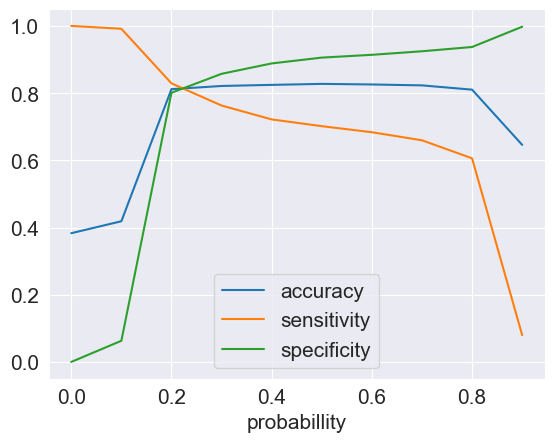

In [589]:
probabillity_cutoff.plot.line(x='probabillity', y=['accuracy','sensitivity','specificity'])
plt.show()

In [590]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Probabillity.map( lambda x: 1 if x > 0.2 else 0)
y_train_pred_final.head()

,Converted,Converted_Probabillity,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.134871,0,1,1,0,0,0,0,0,0,0,0
1,1,0.838238,1,1,1,1,1,1,1,1,1,1,0
2,0,0.134316,0,1,1,0,0,0,0,0,0,0,0
3,0,0.081759,0,1,0,0,0,0,0,0,0,0,0
4,0,0.140620,0,1,1,0,0,0,0,0,0,0,0


In [591]:
y_train_pred_final['Score'] = y_train_pred_final.Converted_Probabillity.map(lambda x: round(x*100))
y_train_pred_final

,Converted,Converted_Probabillity,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Score
0,0,0.134871,0,1,1,0,0,0,0,0,0,0,0,13
1,1,0.838238,1,1,1,1,1,1,1,1,1,1,0,84
2,0,0.134316,0,1,1,0,0,0,0,0,0,0,0,13
3,0,0.081759,0,1,0,0,0,0,0,0,0,0,0,8
4,0,0.140620,0,1,1,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7387,0,0.142934,0,1,1,0,0,0,0,0,0,0,0,14
7388,0,0.144577,0,1,1,0,0,0,0,0,0,0,0,14
7389,0,0.058091,0,1,0,0,0,0,0,0,0,0,0,6
7390,0,0.054270,0,1,0,0,0,0,0,0,0,0,0,5


#### Random Forst

In [ ]:
randclf = RandomForestClassifier()
randclf.fit(X_train_vif, y_train) 

RandomForestClassifier()

In [ ]:

print("Score the X-train with Y-train is : ", str(round(randclf.score(X_train_vif,y_train)*100,2)),"%")
print("Score the X-test  with Y-test  is : ", str(round(randclf.score(X_test_vif,y_test)*100,2)),"%")

Y_pred=randclf.predict(X_test_vif)
print("Accuracy is " , round(accuracy_score(y_test,Y_pred)*100,2),"%")

Score the X-train with Y-train is :  94.33 %
Score the X-test  with Y-test  is :  77.76 %
Accuracy is  77.76 %
